=== Dataset Overview ===
Total Records: 4,864
Number of Features: 22
Time Range: 2020-02-03 to 2024-11-29
Number of Companies: 4
Companies: Apple, Philips, Tesla, Alibaba


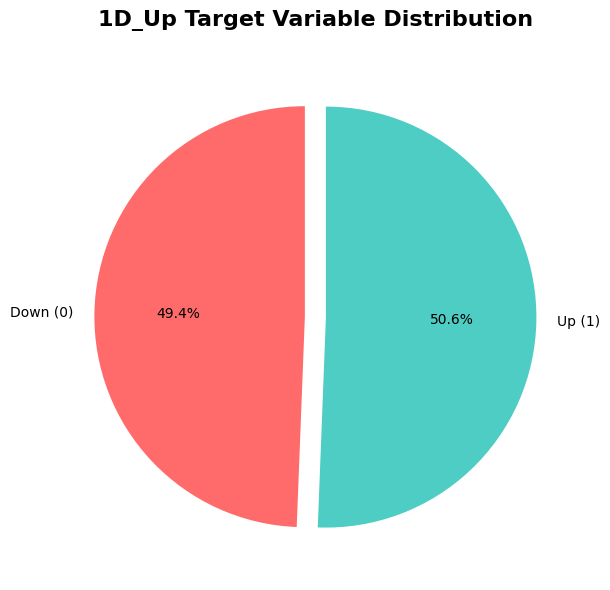

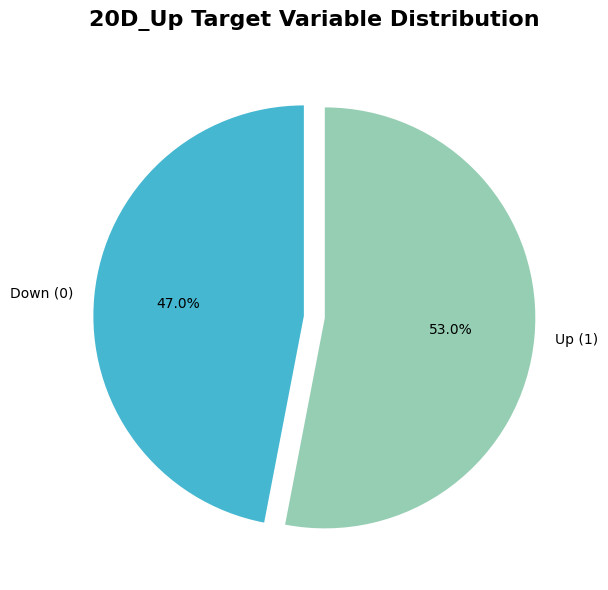

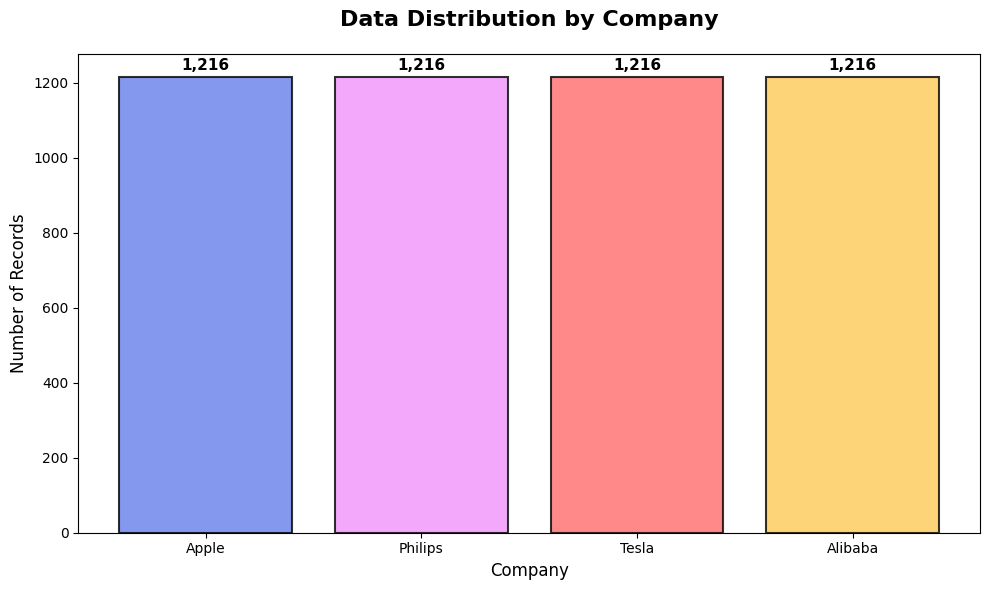

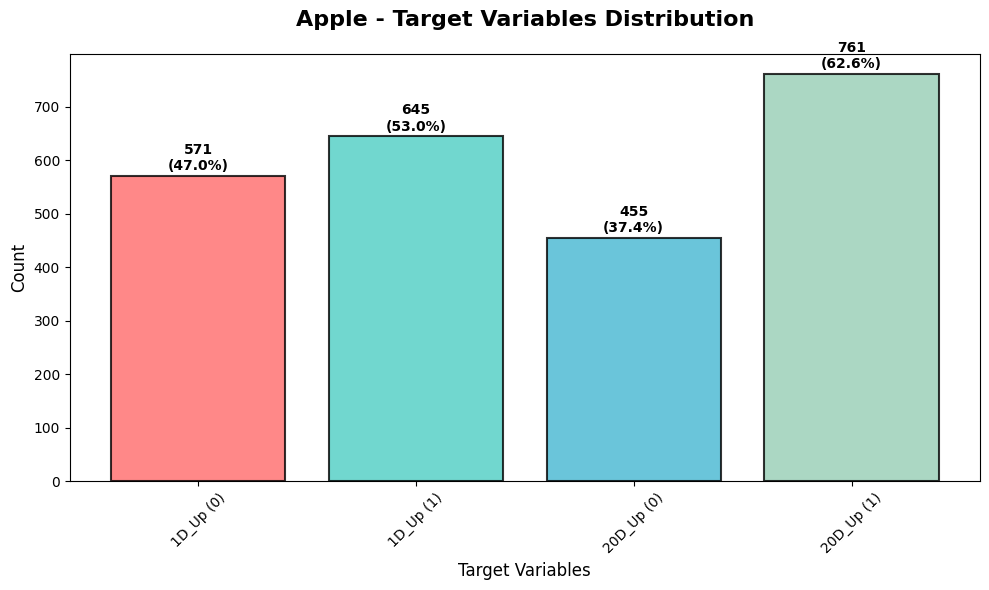

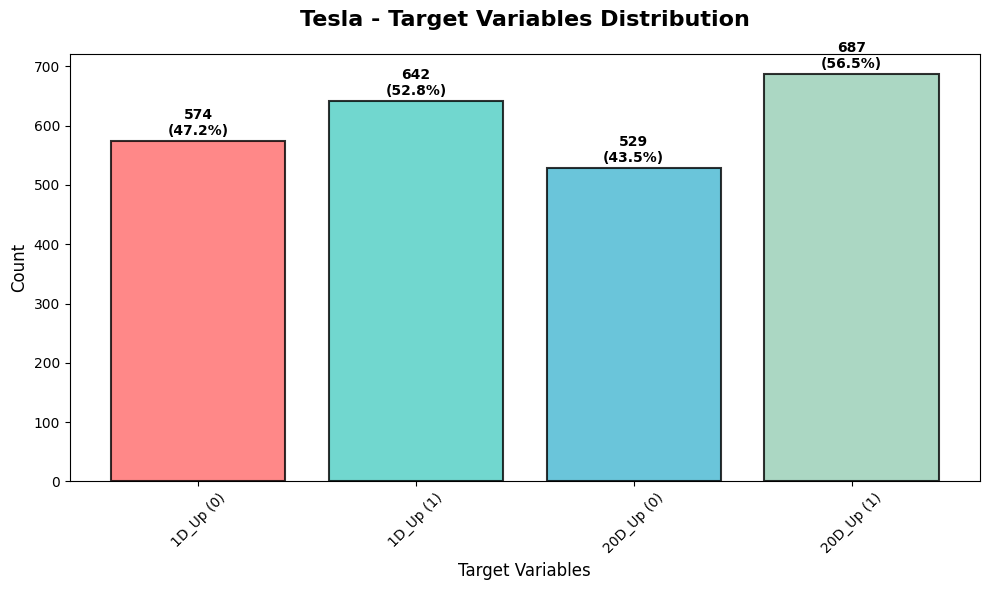

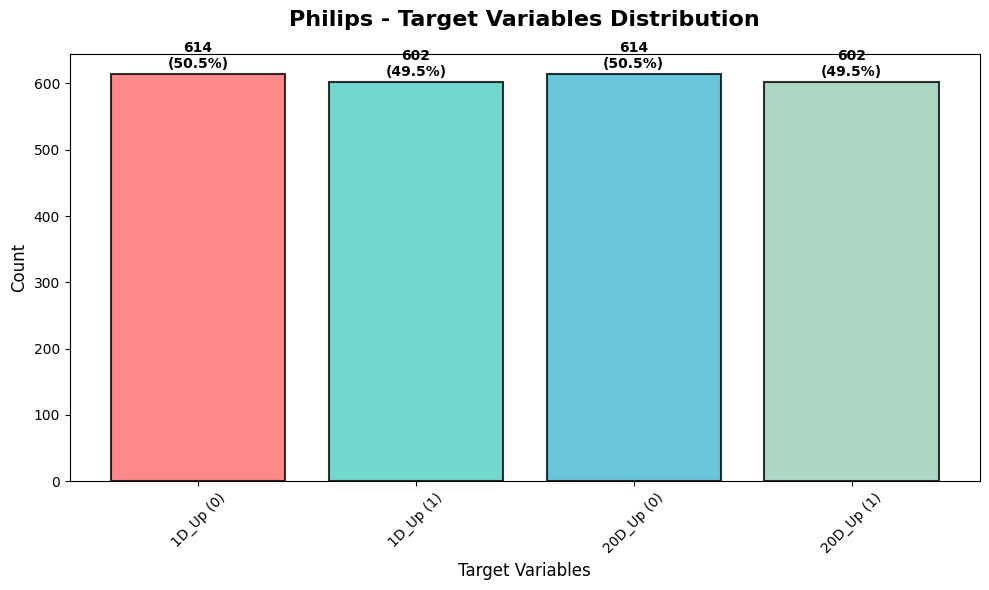

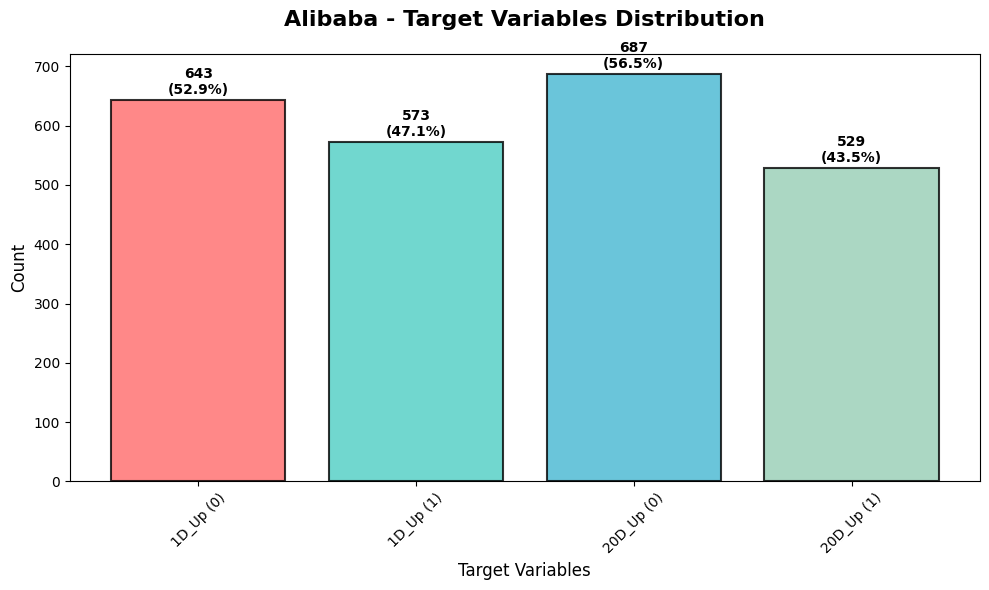

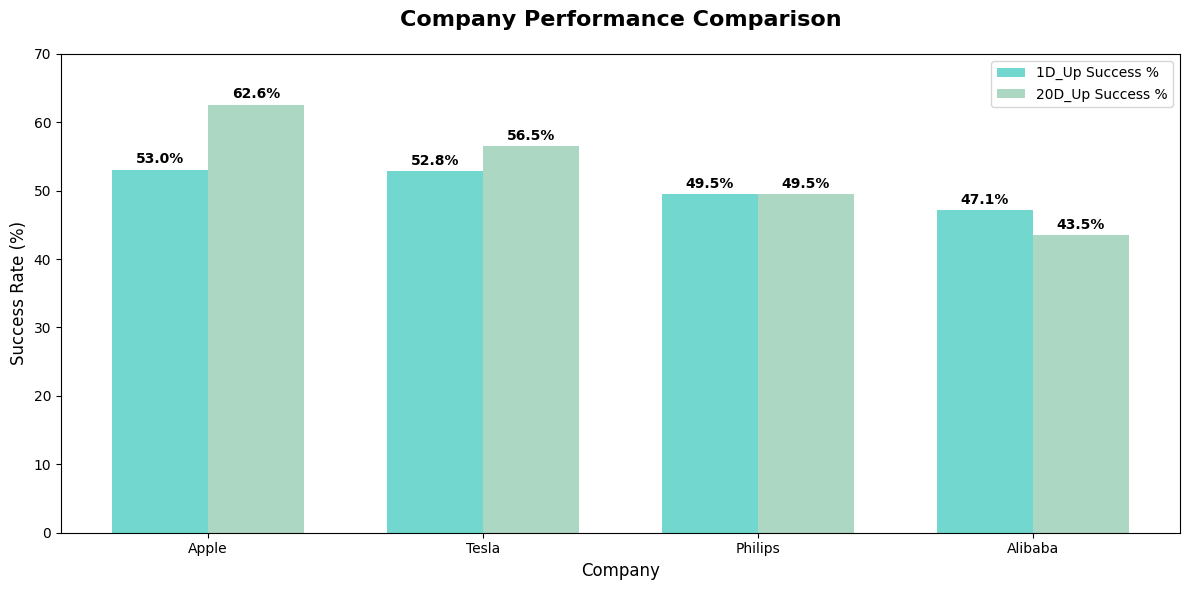


=== Detailed Target Variable Analysis ===

1D_Up Distribution:
  0: 2,402 (49.38%)
  1: 2,462 (50.62%)

20D_Up Distribution:
  0: 2,285 (46.98%)
  1: 2,579 (53.02%)

=== Company-wise Target Variable Analysis ===

Apple (Total: 1,216):
  1D_Up:
    0: 571 (46.96%)
    1: 645 (53.04%)
  20D_Up:
    0: 455 (37.42%)
    1: 761 (62.58%)

Tesla (Total: 1,216):
  1D_Up:
    0: 574 (47.20%)
    1: 642 (52.80%)
  20D_Up:
    0: 529 (43.50%)
    1: 687 (56.50%)

Philips (Total: 1,216):
  1D_Up:
    0: 614 (50.49%)
    1: 602 (49.51%)
  20D_Up:
    0: 614 (50.49%)
    1: 602 (49.51%)

Alibaba (Total: 1,216):
  1D_Up:
    0: 643 (52.88%)
    1: 573 (47.12%)
  20D_Up:
    0: 687 (56.50%)
    1: 529 (43.50%)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('DATA.csv')

# Print basic information
print("=== Dataset Overview ===")
print(f"Total Records: {len(df):,}")
print(f"Number of Features: {df.shape[1]}")
print(f"Time Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of Companies: {df['Company'].nunique()}")
print(f"Companies: {', '.join(df['Company'].unique())}")

# ============================================================================
# 1. Target Variable Distribution - 1D_Up (Pie Chart)
# ============================================================================
plt.figure(figsize=(8, 6))
counts_1d = df['1D_Up'].value_counts().sort_index()
colors_1d = ['#FF6B6B', '#4ECDC4']

wedges, texts, autotexts = plt.pie(counts_1d.values, 
                                   labels=['Down (0)', 'Up (1)'], 
                                   autopct='%1.1f%%',
                                   colors=colors_1d,
                                   startangle=90,
                                   explode=(0.05, 0.05))

plt.title('1D_Up Target Variable Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. Target Variable Distribution - 20D_Up (Pie Chart)
# ============================================================================
plt.figure(figsize=(8, 6))
counts_20d = df['20D_Up'].value_counts().sort_index()
colors_20d = ['#45B7D1', '#96CEB4']

wedges, texts, autotexts = plt.pie(counts_20d.values, 
                                   labels=['Down (0)', 'Up (1)'], 
                                   autopct='%1.1f%%',
                                   colors=colors_20d,
                                   startangle=90,
                                   explode=(0.05, 0.05))

plt.title('20D_Up Target Variable Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. Company Data Distribution (Bar Chart)
# ============================================================================
plt.figure(figsize=(10, 6))
company_counts = df['Company'].value_counts()
company_colors = ['#667eea', '#f093fb', '#ff6b6b', '#feca57']

bars = plt.bar(company_counts.index, company_counts.values, 
               color=company_colors, alpha=0.8, edgecolor='black', linewidth=1.5)

plt.title('Data Distribution by Company', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Company', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. Apple Target Variables Distribution
# ============================================================================
plt.figure(figsize=(10, 6))
apple_data = df[df['Company'] == 'Apple']

counts_1d_0 = len(apple_data[apple_data['1D_Up'] == 0])
counts_1d_1 = len(apple_data[apple_data['1D_Up'] == 1])
counts_20d_0 = len(apple_data[apple_data['20D_Up'] == 0])
counts_20d_1 = len(apple_data[apple_data['20D_Up'] == 1])

categories = ['1D_Up (0)', '1D_Up (1)', '20D_Up (0)', '20D_Up (1)']
values = [counts_1d_0, counts_1d_1, counts_20d_0, counts_20d_1]
bar_colors = [colors_1d[0], colors_1d[1], colors_20d[0], colors_20d[1]]

bars = plt.bar(categories, values, color=bar_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

plt.title('Apple - Target Variables Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target Variables', fontsize=12)

# Add percentage labels on bars
total = len(apple_data)
for bar, value in zip(bars, values):
    percentage = (value / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. Tesla Target Variables Distribution
# ============================================================================
plt.figure(figsize=(10, 6))
tesla_data = df[df['Company'] == 'Tesla']

counts_1d_0 = len(tesla_data[tesla_data['1D_Up'] == 0])
counts_1d_1 = len(tesla_data[tesla_data['1D_Up'] == 1])
counts_20d_0 = len(tesla_data[tesla_data['20D_Up'] == 0])
counts_20d_1 = len(tesla_data[tesla_data['20D_Up'] == 1])

values = [counts_1d_0, counts_1d_1, counts_20d_0, counts_20d_1]

bars = plt.bar(categories, values, color=bar_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

plt.title('Tesla - Target Variables Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target Variables', fontsize=12)

total = len(tesla_data)
for bar, value in zip(bars, values):
    percentage = (value / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 6. Philips Target Variables Distribution
# ============================================================================
plt.figure(figsize=(10, 6))
philips_data = df[df['Company'] == 'Philips']

counts_1d_0 = len(philips_data[philips_data['1D_Up'] == 0])
counts_1d_1 = len(philips_data[philips_data['1D_Up'] == 1])
counts_20d_0 = len(philips_data[philips_data['20D_Up'] == 0])
counts_20d_1 = len(philips_data[philips_data['20D_Up'] == 1])

values = [counts_1d_0, counts_1d_1, counts_20d_0, counts_20d_1]

bars = plt.bar(categories, values, color=bar_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

plt.title('Philips - Target Variables Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target Variables', fontsize=12)

total = len(philips_data)
for bar, value in zip(bars, values):
    percentage = (value / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 7. Alibaba Target Variables Distribution
# ============================================================================
plt.figure(figsize=(10, 6))
alibaba_data = df[df['Company'] == 'Alibaba']

counts_1d_0 = len(alibaba_data[alibaba_data['1D_Up'] == 0])
counts_1d_1 = len(alibaba_data[alibaba_data['1D_Up'] == 1])
counts_20d_0 = len(alibaba_data[alibaba_data['20D_Up'] == 0])
counts_20d_1 = len(alibaba_data[alibaba_data['20D_Up'] == 1])

values = [counts_1d_0, counts_1d_1, counts_20d_0, counts_20d_1]

bars = plt.bar(categories, values, color=bar_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

plt.title('Alibaba - Target Variables Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target Variables', fontsize=12)

total = len(alibaba_data)
for bar, value in zip(bars, values):
    percentage = (value / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 8. Company Performance Comparison
# ============================================================================
plt.figure(figsize=(12, 6))

companies = ['Apple', 'Tesla', 'Philips', 'Alibaba']
companies_performance = []

for company in companies:
    company_data = df[df['Company'] == company]
    total = len(company_data)
    
    success_1d = (company_data['1D_Up'] == 1).sum() / total * 100
    success_20d = (company_data['20D_Up'] == 1).sum() / total * 100
    
    companies_performance.append([company, success_1d, success_20d])

companies_perf_df = pd.DataFrame(companies_performance, 
                                columns=['Company', '1D_Up Success %', '20D_Up Success %'])

x = np.arange(len(companies))
width = 0.35

bars1 = plt.bar(x - width/2, companies_perf_df['1D_Up Success %'], width, 
                label='1D_Up Success %', color=colors_1d[1], alpha=0.8)
bars2 = plt.bar(x + width/2, companies_perf_df['20D_Up Success %'], width,
                label='20D_Up Success %', color=colors_20d[1], alpha=0.8)

plt.ylabel('Success Rate (%)', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.title('Company Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, companies)
plt.legend()
plt.ylim(0, 70)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# Print Detailed Statistics
# ============================================================================
print("\n=== Detailed Target Variable Analysis ===")
for target in ['1D_Up', '20D_Up']:
    print(f"\n{target} Distribution:")
    counts = df[target].value_counts().sort_index()
    for value, count in counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count:,} ({percentage:.2f}%)")

print("\n=== Company-wise Target Variable Analysis ===")
for company in companies:
    company_data = df[df['Company'] == company]
    total = len(company_data)
    print(f"\n{company} (Total: {total:,}):")
    
    for target in ['1D_Up', '20D_Up']:
        counts = company_data[target].value_counts().sort_index()
        print(f"  {target}:")
        for value, count in counts.items():
            percentage = (count / total) * 100
            print(f"    {value}: {count:,} ({percentage:.2f}%)")

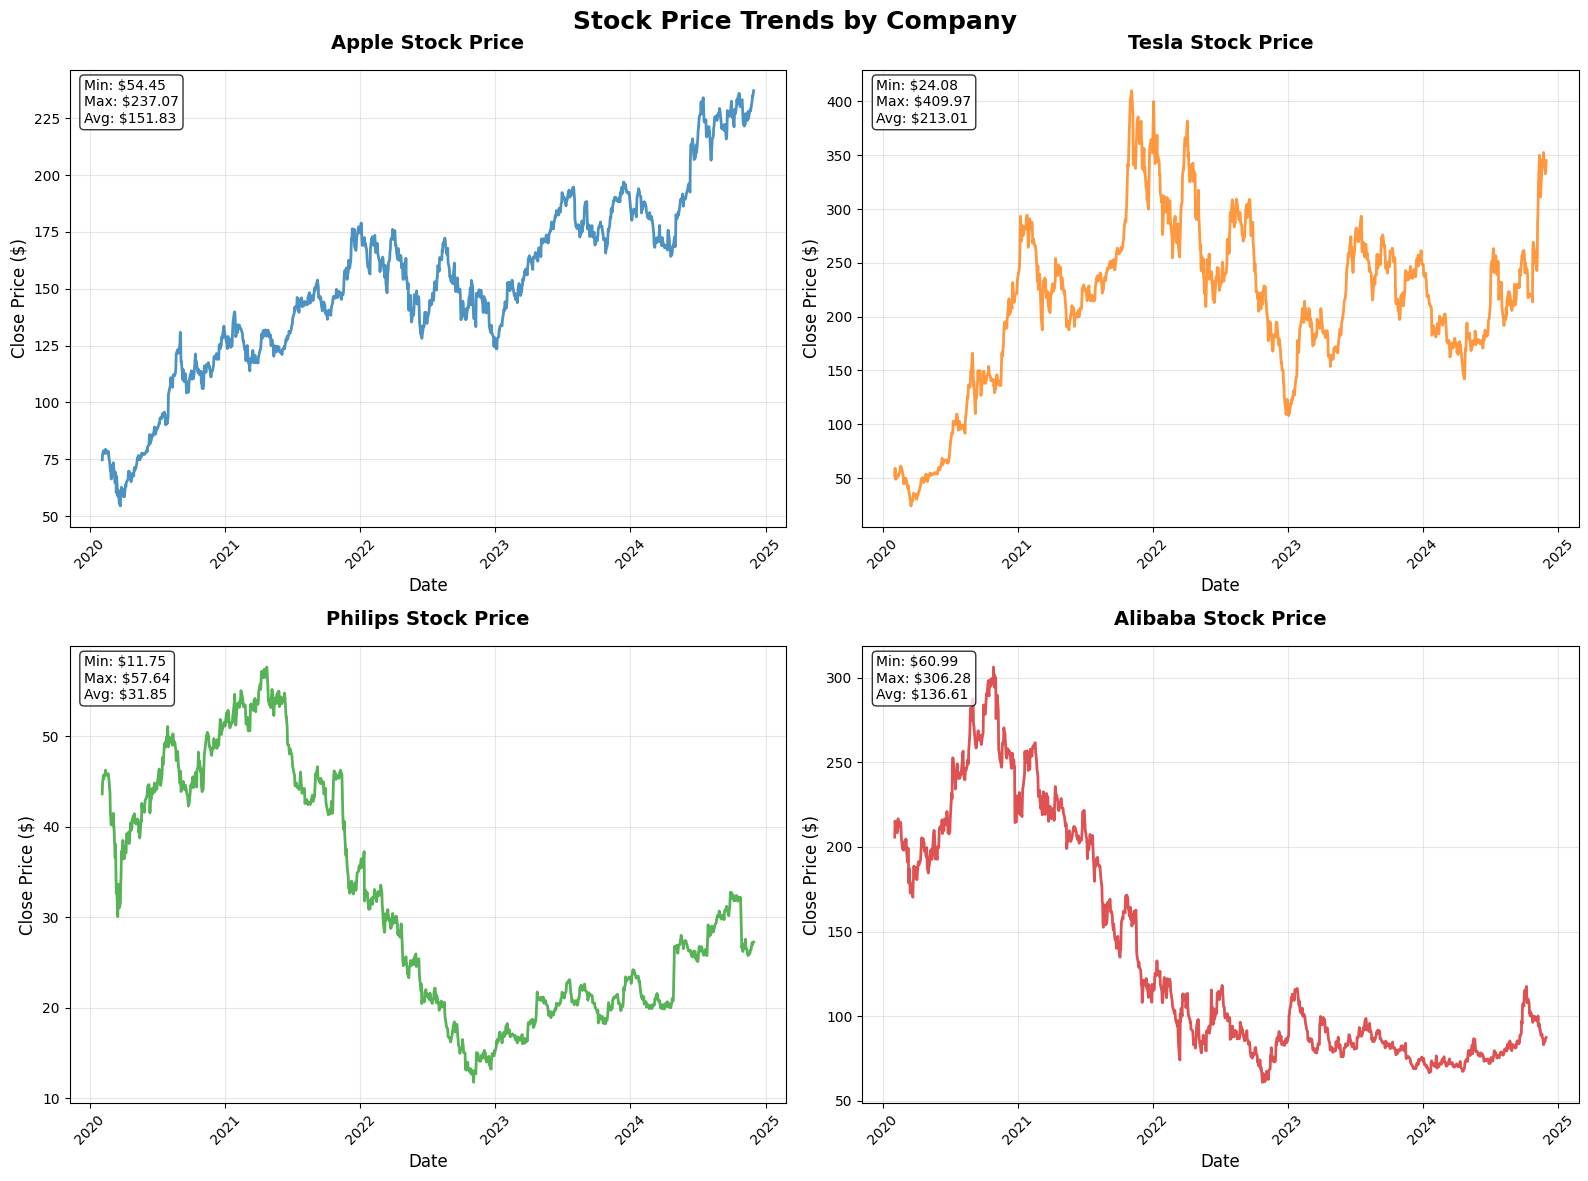

In [3]:
# ============================================================================
# 9. Company Stock Price Trends (2x2 Subplots)
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Stock Price Trends by Company', fontsize=18, fontweight='bold', y=0.98)

companies = ['Apple', 'Tesla', 'Philips', 'Alibaba']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, company in enumerate(companies):
    row = i // 2
    col = i % 2
    
    company_data = df[df['Company'] == company].copy()
    company_data['Date'] = pd.to_datetime(company_data['Date'])
    company_data = company_data.sort_values('Date')
    
    axes[row, col].plot(company_data['Date'], company_data['Close'], 
                       color=colors[i], linewidth=2, alpha=0.8)
    axes[row, col].set_title(f'{company} Stock Price', fontsize=14, fontweight='bold', pad=15)
    axes[row, col].set_xlabel('Date', fontsize=12)
    axes[row, col].set_ylabel('Close Price ($)', fontsize=12)
    axes[row, col].grid(True, alpha=0.3)
    
    # Format x-axis to show dates nicely
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add some statistics as text
    min_price = company_data['Close'].min()
    max_price = company_data['Close'].max()
    avg_price = company_data['Close'].mean()
    
    stats_text = f'Min: ${min_price:.2f}\nMax: ${max_price:.2f}\nAvg: ${avg_price:.2f}'
    axes[row, col].text(0.02, 0.98, stats_text, transform=axes[row, col].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Available features: 13 / 13
Available features: ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct', 'J', 'mfi', 'MACD', 'MACD_diff', 'BB_rel_pos', 'Vol_Change', 'MA5_GT_MA20', 'Bitcoin_Close', 'Gold_Close', 'Interest_Rate']


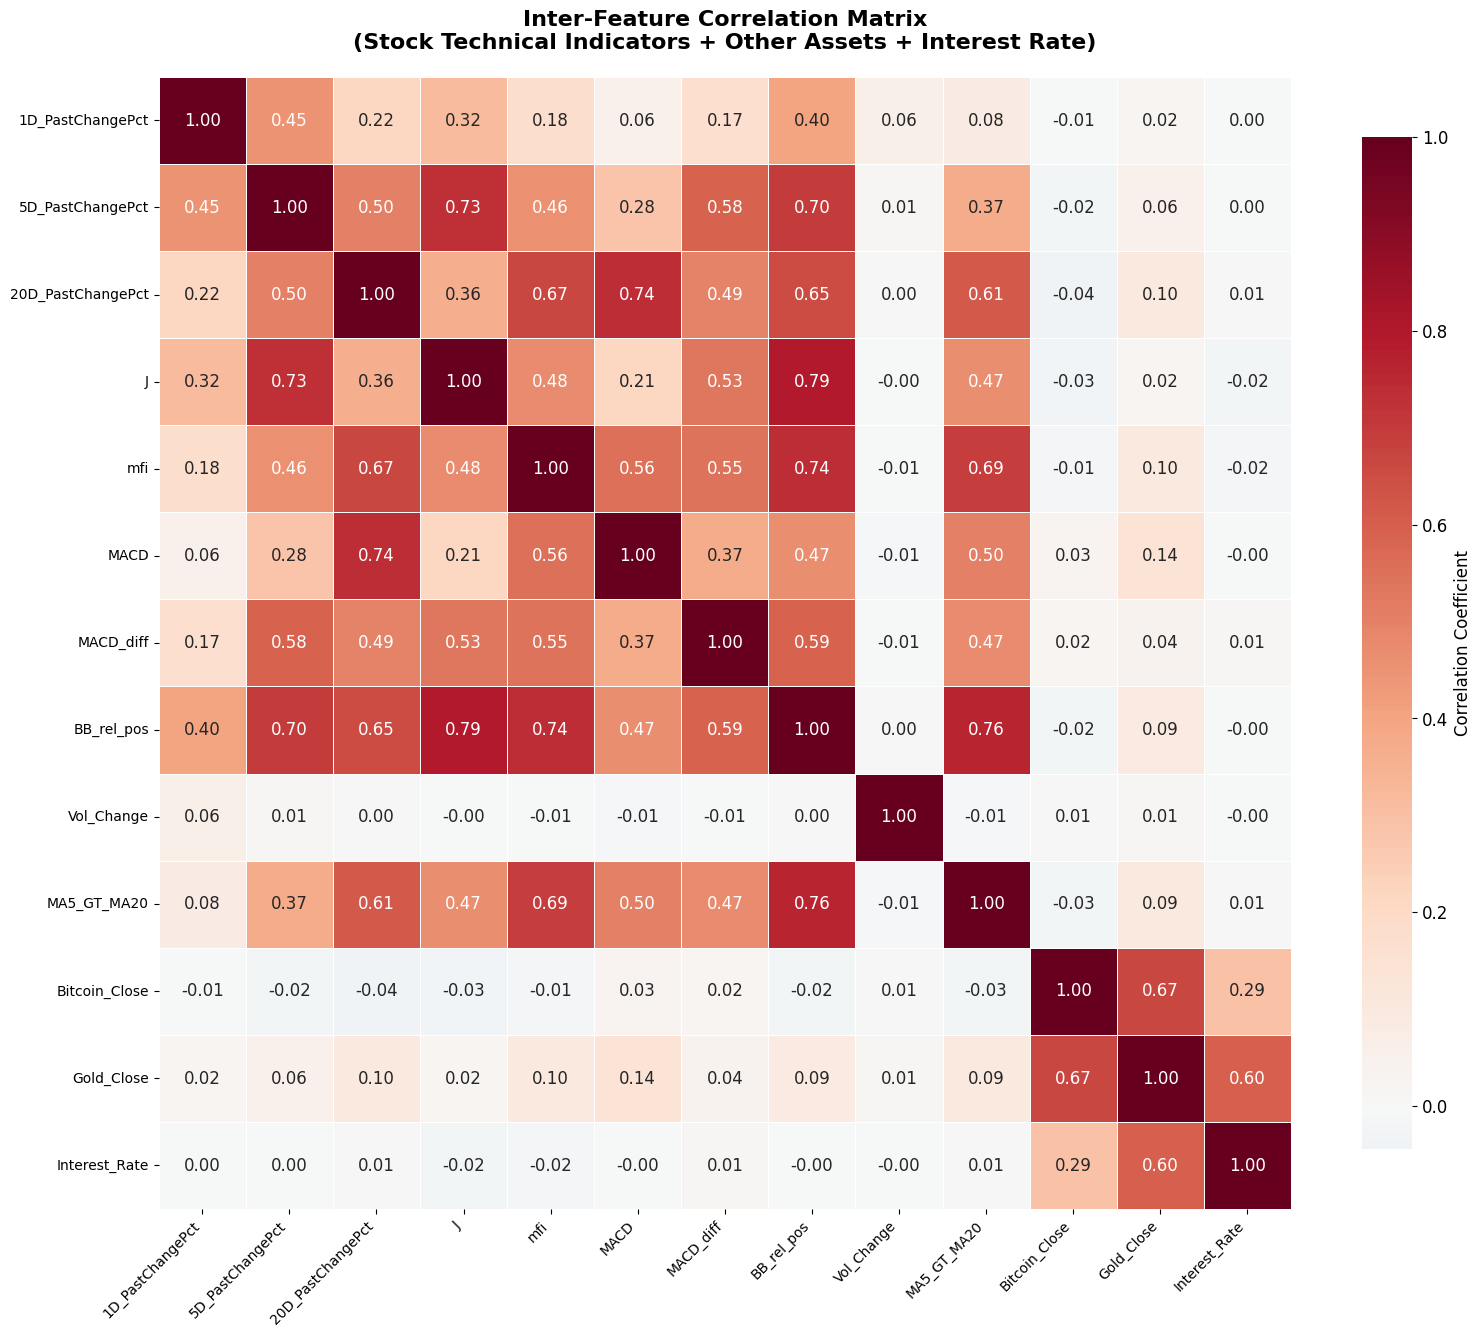


=== High Correlation Feature Pairs Analysis ===
Found 6 highly correlated feature pairs (|correlation| >= 0.7):
  J ↔ BB_rel_pos: 0.791
  BB_rel_pos ↔ MA5_GT_MA20: 0.763
  20D_PastChangePct ↔ MACD: 0.741
  mfi ↔ BB_rel_pos: 0.740
  5D_PastChangePct ↔ J: 0.734
  5D_PastChangePct ↔ BB_rel_pos: 0.701

Medium correlation feature pairs (0.5 <= |correlation| < 0.7):
  mfi ↔ MA5_GT_MA20: 0.689
  Bitcoin_Close ↔ Gold_Close: 0.669
  20D_PastChangePct ↔ mfi: 0.667
  20D_PastChangePct ↔ BB_rel_pos: 0.652
  20D_PastChangePct ↔ MA5_GT_MA20: 0.609
  Gold_Close ↔ Interest_Rate: 0.595
  MACD_diff ↔ BB_rel_pos: 0.589
  5D_PastChangePct ↔ MACD_diff: 0.585
  mfi ↔ MACD: 0.555
  mfi ↔ MACD_diff: 0.546

=== Stock Technical Indicators Internal Correlations ===
Available features: ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct', 'J', 'mfi', 'MACD', 'MACD_diff', 'BB_rel_pos', 'Vol_Change', 'MA5_GT_MA20']
High correlations within category:
  J ↔ BB_rel_pos: 0.791
  BB_rel_pos ↔ MA5_GT_MA20: 0.763

In [28]:
# ============================================================================
# Inter-Feature Correlation Analysis (Excluding Target Variables 1D_Up and 20D_Up)
# ============================================================================

# Define feature categories
stock_features = ['1D_PastChangePct', '5D_PastChangePct','20D_PastChangePct', 'J', 
                  'mfi', 'MACD', 'MACD_diff',  'BB_rel_pos', 'Vol_Change','MA5_GT_MA20']

other_assets_features = ['Bitcoin_Close', 'Gold_Close']

interest_rate_feature = ['Interest_Rate']

# Combine all features (excluding target variables)
all_features = stock_features + other_assets_features + interest_rate_feature

# Filter features that exist in the dataset
available_features = [f for f in all_features if f in df.columns]
print(f"Available features: {len(available_features)} / {len(all_features)}")
print(f"Available features: {available_features}")

# ============================================================================
# 1. Complete Feature Correlation Matrix
# ============================================================================

if len(available_features) > 1:
    plt.figure(figsize=(16, 14))
    
    # Calculate correlation matrix
    correlation_matrix = df[available_features].corr()
    
    # Create heatmap
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='RdBu_r', 
                center=0, 
                square=True, 
                fmt='.2f', 
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                linewidths=0.5)
    
    plt.title('Inter-Feature Correlation Matrix\n(Stock Technical Indicators + Other Assets + Interest Rate)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 2. High Correlation Feature Pairs Identification
# ============================================================================

def find_high_correlations(corr_matrix, threshold=0.7):
    """Find highly correlated feature pairs"""
    high_corr_pairs = []
    
    # Get upper triangle matrix (avoid duplicates and self-correlation)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                high_corr_pairs.append({
                    'Feature1': corr_matrix.columns[i],
                    'Feature2': corr_matrix.columns[j],
                    'Correlation': corr_value
                })
    
    return sorted(high_corr_pairs, key=lambda x: abs(x['Correlation']), reverse=True)

if len(available_features) > 1:
    print("\n=== High Correlation Feature Pairs Analysis ===")
    
    # Find feature pairs with |correlation| > 0.7
    high_corr_pairs = find_high_correlations(correlation_matrix, threshold=0.7)
    
    if high_corr_pairs:
        print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|correlation| >= 0.7):")
        for pair in high_corr_pairs:
            print(f"  {pair['Feature1']} ↔ {pair['Feature2']}: {pair['Correlation']:.3f}")
    else:
        print("No highly correlated feature pairs found (|correlation| >= 0.7)")
    
    # Also check medium correlation (0.5-0.7)
    medium_corr_pairs = find_high_correlations(correlation_matrix, threshold=0.5)
    medium_corr_pairs = [p for p in medium_corr_pairs if abs(p['Correlation']) < 0.7]
    
    if medium_corr_pairs:
        print(f"\nMedium correlation feature pairs (0.5 <= |correlation| < 0.7):")
        for pair in medium_corr_pairs[:10]:  # Show only top 10
            print(f"  {pair['Feature1']} ↔ {pair['Feature2']}: {pair['Correlation']:.3f}")

# ============================================================================
# 3. Category-wise Correlation Analysis
# ============================================================================

def analyze_category_correlations(df, category_features, category_name):
    """Analyze correlations within a specific category"""
    available_in_category = [f for f in category_features if f in df.columns]
    
    if len(available_in_category) > 1:
        print(f"\n=== {category_name} Internal Correlations ===")
        print(f"Available features: {available_in_category}")
        
        category_corr = df[available_in_category].corr()
        
        # Find high correlations within category
        high_corr = find_high_correlations(category_corr, threshold=0.5)
        if high_corr:
            print("High correlations within category:")
            for pair in high_corr:
                print(f"  {pair['Feature1']} ↔ {pair['Feature2']}: {pair['Correlation']:.3f}")
        else:
            print("No significant correlations within category")
        
        return category_corr
    else:
        print(f"\n=== {category_name} ===")
        print(f"Insufficient features (<2) for correlation analysis")
        return None

# Analyze intra-category correlations
stock_corr = analyze_category_correlations(df, stock_features, "Stock Technical Indicators")
assets_corr = analyze_category_correlations(df, other_assets_features, "Other Assets")

# ============================================================================
# 4. Cross-Category Correlation Analysis
# ============================================================================

print("\n=== Cross-Category Correlation Analysis ===")

# Stock features vs Other assets
available_stock = [f for f in stock_features if f in df.columns]
available_assets = [f for f in other_assets_features if f in df.columns]
available_interest = [f for f in interest_rate_feature if f in df.columns]

if available_stock and available_assets:
    print("\nStock Technical Indicators vs Other Assets:")
    for stock_feat in available_stock:
        for asset_feat in available_assets:
            corr = df[stock_feat].corr(df[asset_feat])
            if abs(corr) > 0.3:  # Only show stronger correlations
                print(f"  {stock_feat} ↔ {asset_feat}: {corr:.3f}")

if available_stock and available_interest:
    print("\nStock Technical Indicators vs Interest Rate:")
    for stock_feat in available_stock:
        for int_feat in available_interest:
            corr = df[stock_feat].corr(df[int_feat])
            if abs(corr) > 0.3:
                print(f"  {stock_feat} ↔ {int_feat}: {corr:.3f}")

if available_assets and available_interest:
    print("\nOther Assets vs Interest Rate:")
    for asset_feat in available_assets:
        for int_feat in available_interest:
            corr = df[asset_feat].corr(df[int_feat])
            if abs(corr) > 0.3:
                print(f"  {asset_feat} ↔ {int_feat}: {corr:.3f}")

# ============================================================================
# 5. Feature Redundancy Recommendations
# ============================================================================

print("\n=== Feature Selection Recommendations ===")

if len(available_features) > 1:
    # Provide feature selection recommendations based on correlations
    high_corr_pairs = find_high_correlations(correlation_matrix, threshold=0.8)
    
    if high_corr_pairs:
        print("Recommended features to consider removing (redundant):")
        processed_features = set()
        for pair in high_corr_pairs:
            feat1, feat2 = pair['Feature1'], pair['Feature2']
            if feat1 not in processed_features and feat2 not in processed_features:
                print(f"  Keep {feat1}, consider removing {feat2} (correlation: {pair['Correlation']:.3f})")
                processed_features.add(feat2)
    else:
        print("No obvious redundant features detected")

# ============================================================================
# 6. Feature Availability Report
# ============================================================================
print("\n=== Feature Availability Report ===")
categories = {
    'Stock Technical Indicators': stock_features,
    'Other Asset Prices': other_assets_features,
    'Interest Rate Indicators': interest_rate_feature,
}

for category, features in categories.items():
    available_in_category = [f for f in features if f in df.columns]
    missing_in_category = [f for f in features if f not in df.columns]
    
    print(f"\n{category}:")
    print(f"  Available: {len(available_in_category)}/{len(features)}")
    print(f"  Available features: {available_in_category}")
    if missing_in_category:
        print(f"  Missing features: {missing_in_category}")

## first

Training set size: 3404
Validation set size: 728
Test set size: 732
Training set company distribution:
Company
Alibaba    851
Apple      851
Philips    851
Tesla      851
Name: count, dtype: int64
Test set company distribution:
Company
Alibaba    183
Apple      183
Philips    183
Tesla      183
Name: count, dtype: int64
1D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


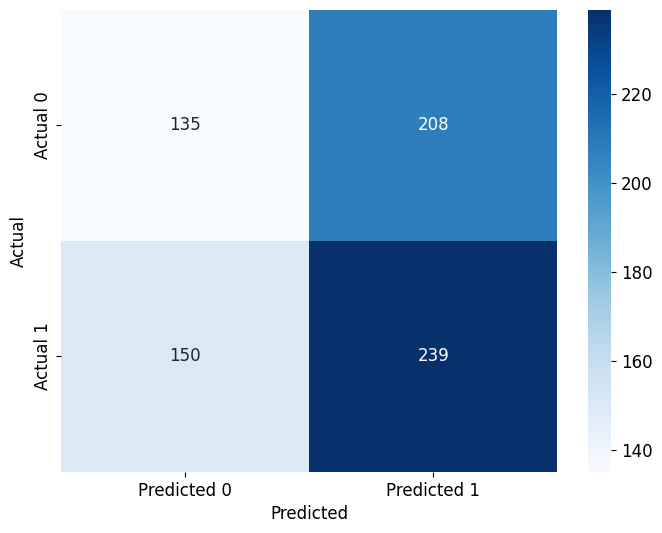

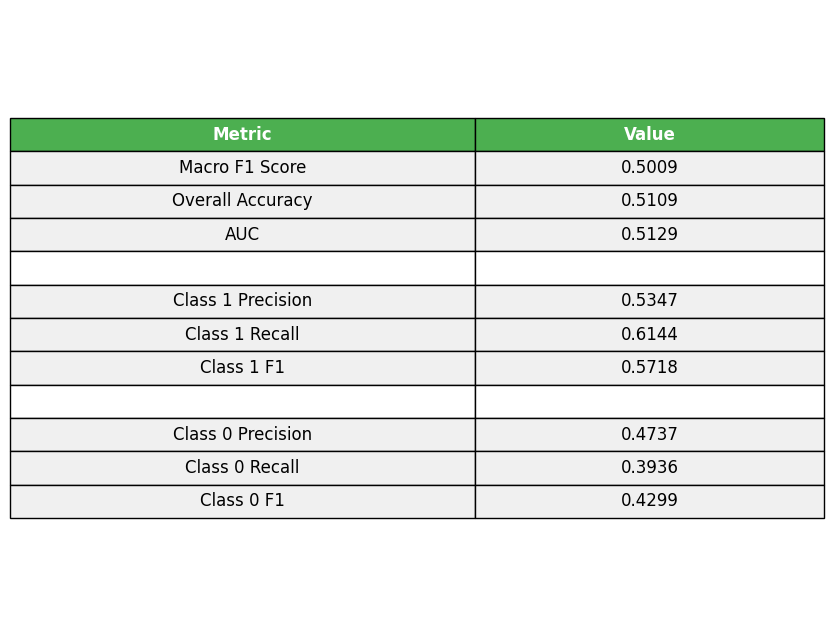


20D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


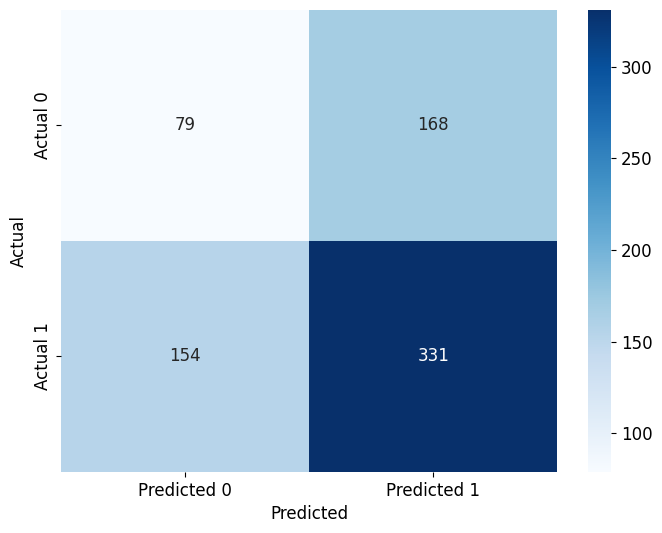

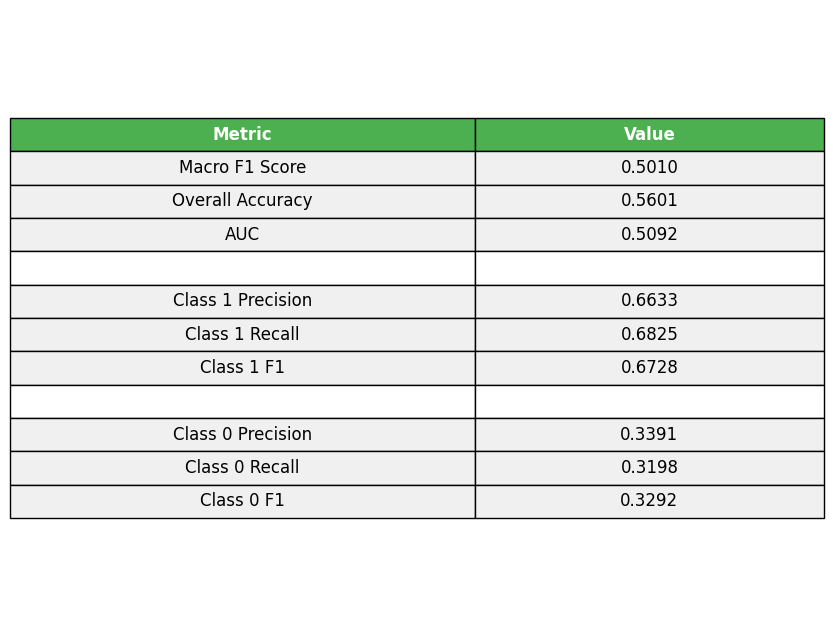

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('DATA.csv')

# Define feature columns
continuous_features = ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct',  'J', 
                      'mfi', 'MACD', 'MACD_diff', 'BB_rel_pos', 'Vol_Change']
binary_features = ['MA5_GT_MA20']
features = continuous_features + binary_features

# Split data by company in chronological order
train_data_list = []
val_data_list = []
test_data_list = []

for company in df['Company'].unique():
    company_data = df[df['Company'] == company].copy()
    company_data = company_data.sort_values('Date')  # Ensure chronological order
    
    n_company = len(company_data)
    train_size = int(0.7 * n_company)
    val_size = int(0.15 * n_company)
    
    train_data_list.append(company_data.iloc[:train_size])
    val_data_list.append(company_data.iloc[train_size:train_size+val_size])
    test_data_list.append(company_data.iloc[train_size+val_size:])

# Concatenate all companies' data
train_data = pd.concat(train_data_list, ignore_index=True)
val_data = pd.concat(val_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Training set company distribution:\n{train_data['Company'].value_counts().sort_index()}")
print(f"Test set company distribution:\n{test_data['Company'].value_counts().sort_index()}")

# Modified preprocessing function
def preprocess_data(train_df, val_df, test_df, target_col, continuous_features, binary_features):
    all_features = continuous_features + binary_features
    
    # Drop missing values
    train_df = train_df.dropna(subset=all_features + [target_col])
    val_df = val_df.dropna(subset=all_features + [target_col])
    test_df = test_df.dropna(subset=all_features + [target_col])
    
    # Separate continuous and binary features
    X_train_continuous = train_df[continuous_features]
    X_val_continuous = val_df[continuous_features]
    X_test_continuous = test_df[continuous_features]
    
    X_train_binary = train_df[binary_features]
    X_val_binary = val_df[binary_features]
    X_test_binary = test_df[binary_features]
    
    y_train = train_df[target_col]
    y_val = val_df[target_col]
    y_test = test_df[target_col]
    
    # Standardize only continuous features
    scaler = StandardScaler()
    X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
    X_val_continuous_scaled = scaler.transform(X_val_continuous)
    X_test_continuous_scaled = scaler.transform(X_test_continuous)
    
    # Combine scaled continuous features with unscaled binary features
    X_train_scaled = np.hstack([X_train_continuous_scaled, X_train_binary.values])
    X_val_scaled = np.hstack([X_val_continuous_scaled, X_val_binary.values])
    X_test_scaled = np.hstack([X_test_continuous_scaled, X_test_binary.values])
    
    return X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, scaler

# NEW Evaluation function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Overall metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    
    # Class-specific metrics
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Performance metrics table - NEW FORMAT
    plt.figure(figsize=(10, 8))
    plt.axis('tight')
    plt.axis('off')
    
    table_data = [
        ['Metric', 'Value'],
        ['Macro F1 Score', f'{f1_macro:.4f}'],
        ['Overall Accuracy', f'{accuracy:.4f}'],
        ['AUC', f'{auc:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 1 Precision', f'{precision_per_class[1]:.4f}'],
        ['Class 1 Recall', f'{recall_per_class[1]:.4f}'],
        ['Class 1 F1', f'{f1_per_class[1]:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 0 Precision', f'{precision_per_class[0]:.4f}'],
        ['Class 0 Recall', f'{recall_per_class[0]:.4f}'],
        ['Class 0 F1', f'{f1_per_class[0]:.4f}']
    ]
    
    table = plt.table(cellText=table_data[1:], colLabels=table_data[0],
                     cellLoc='center', loc='center',
                     colWidths=[0.4, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 2)
    
    # Set table style
    for i in range(len(table_data)):
        for j in range(len(table_data[0])):
            cell = table[(i, j)]
            if i == 0:  # header
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            elif len(table_data[i]) > 0 and table_data[i][0] == '':  # empty rows
                cell.set_facecolor('#ffffff')
                cell.set_text_props(color='white')
            else:
                cell.set_facecolor('#f0f0f0')
    
    plt.show()
    
    return {'confusion_matrix': cm, 'f1_macro': f1_macro, 'accuracy': accuracy, 'auc': auc,
            'class_0_precision': precision_per_class[0], 'class_0_recall': recall_per_class[0], 'class_0_f1': f1_per_class[0],
            'class_1_precision': precision_per_class[1], 'class_1_recall': recall_per_class[1], 'class_1_f1': f1_per_class[1]}

# 1D_Up prediction
print("=" * 50)
print("1D_Up Prediction Model")
print("=" * 50)

X_train_1d, y_train_1d, X_val_1d, y_val_1d, X_test_1d, y_test_1d, scaler_1d = preprocess_data(
    train_data, val_data, test_data, '1D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_1d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_1d.fit(X_train_1d, y_train_1d)
best_C_1d = grid_search_1d.best_params_['C']
print(f"Best regularization parameter C: {best_C_1d}")

# Train final model with best parameter
final_model_1d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_1d, random_state=42)
final_model_1d.fit(X_train_1d, y_train_1d)

# Evaluate on test set
y_pred_1d = final_model_1d.predict(X_test_1d)
y_prob_1d = final_model_1d.predict_proba(X_test_1d)[:, 1]

print("\nTest Set Results:")
results_1d = evaluate_model(y_test_1d, y_pred_1d, y_prob_1d, "1D_Up Prediction")

# 20D_Up prediction
print("\n" + "=" * 50)
print("20D_Up Prediction Model")
print("=" * 50)

X_train_20d, y_train_20d, X_val_20d, y_val_20d, X_test_20d, y_test_20d, scaler_20d = preprocess_data(
    train_data, val_data, test_data, '20D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
grid_search_20d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_20d.fit(X_train_20d, y_train_20d)
best_C_20d = grid_search_20d.best_params_['C']
print(f"Best regularization parameter C: {best_C_20d}")

# Train final model with best parameter
final_model_20d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_20d, random_state=42)
final_model_20d.fit(X_train_20d, y_train_20d)

# Evaluate on test set
y_pred_20d = final_model_20d.predict(X_test_20d)
y_prob_20d = final_model_20d.predict_proba(X_test_20d)[:, 1]

print("\nTest Set Results:")
results_20d = evaluate_model(y_test_20d, y_pred_20d, y_prob_20d, "20D_Up Prediction")

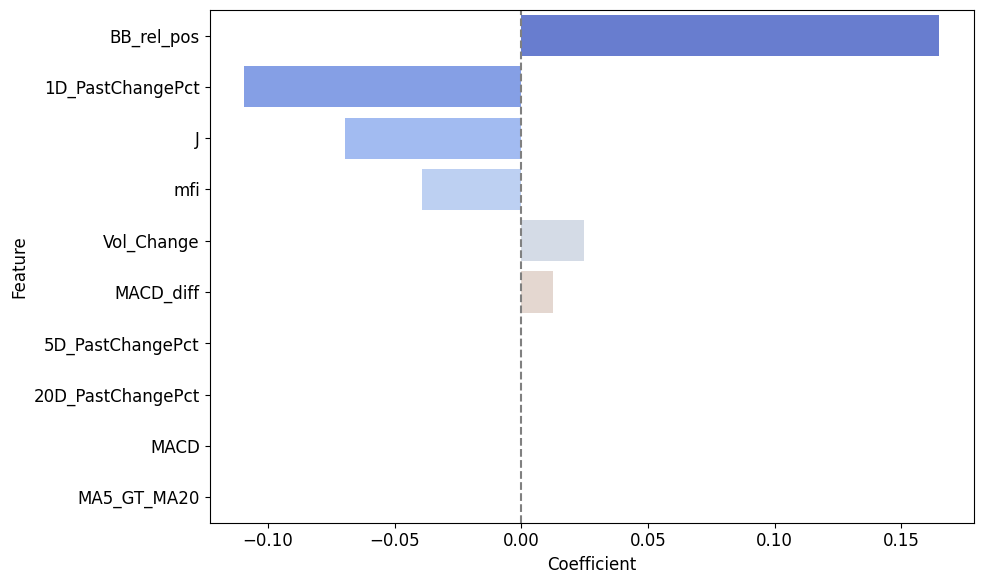

          Feature  Coefficient
       BB_rel_pos     0.165005
 1D_PastChangePct    -0.109402
                J    -0.069596
              mfi    -0.039154
       Vol_Change     0.024777
        MACD_diff     0.012434
 5D_PastChangePct     0.000000
20D_PastChangePct     0.000000
             MACD     0.000000
      MA5_GT_MA20     0.000000


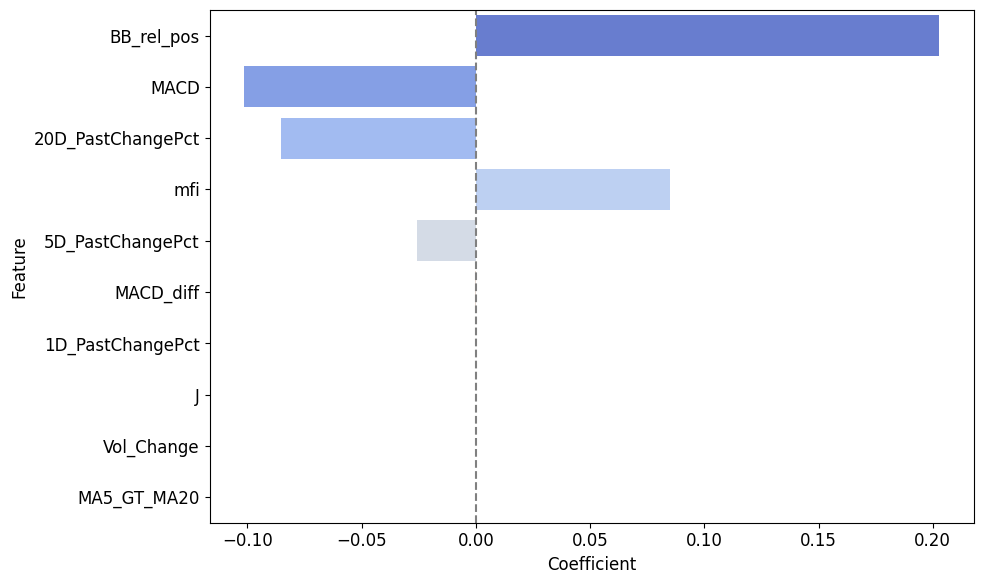

          Feature  Coefficient
       BB_rel_pos     0.202832
             MACD    -0.101378
20D_PastChangePct    -0.085497
              mfi     0.084869
 5D_PastChangePct    -0.025990
        MACD_diff    -0.000516
 1D_PastChangePct    -0.000136
                J     0.000000
       Vol_Change     0.000000
      MA5_GT_MA20     0.000000


In [25]:
def plot_coefficients(model, feature_names, model_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

    plt.figure(figsize=(10, max(6, 0.4*len(coef_df))))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Optionally print table too
    print(coef_df.to_string(index=False))
plot_coefficients(final_model_1d, features, "1D_Up Prediction")
plot_coefficients(final_model_20d, features, "20D_Up Prediction")

## add BTC

Training set size: 3404
Validation set size: 728
Test set size: 732
Training set company distribution:
Company
Alibaba    851
Apple      851
Philips    851
Tesla      851
Name: count, dtype: int64
Test set company distribution:
Company
Alibaba    183
Apple      183
Philips    183
Tesla      183
Name: count, dtype: int64
1D_Up Prediction Model with Threshold Optimization
Best regularization parameter C: 0.1

Finding optimal threshold on validation set...


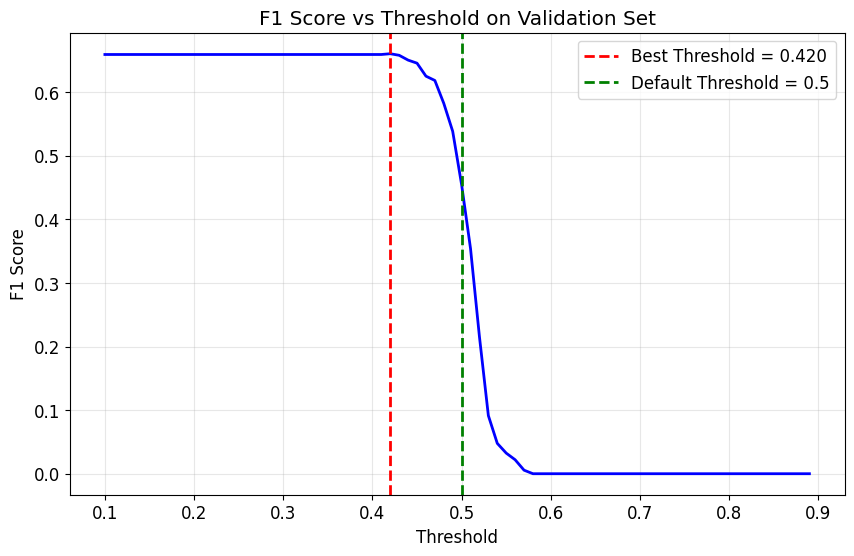

Optimal threshold: 0.420
Best validation F1 score: 0.6605

Test Set Results Comparison:


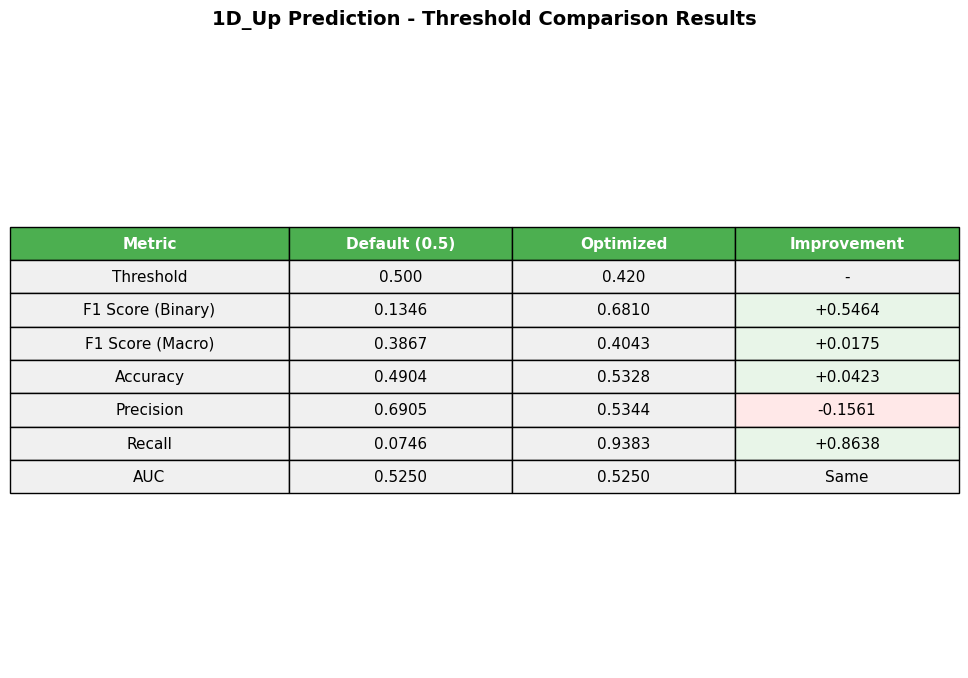

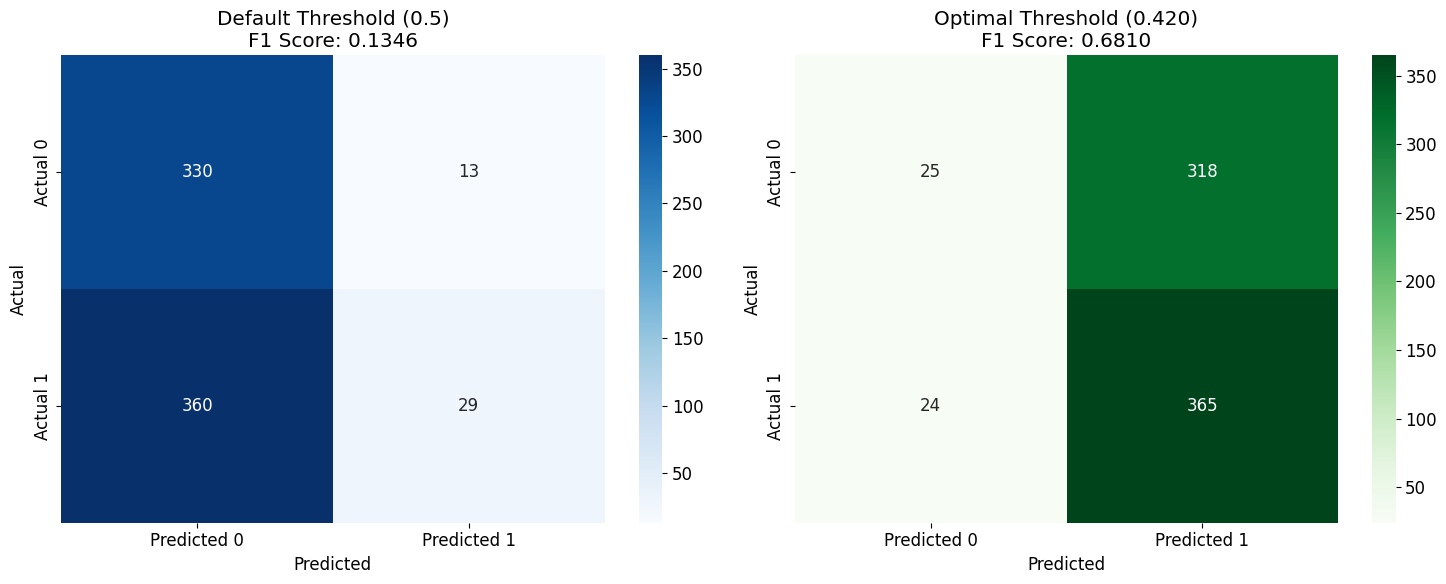


20D_Up Prediction Model with Threshold Optimization
Best regularization parameter C: 0.1

Finding optimal threshold on validation set...


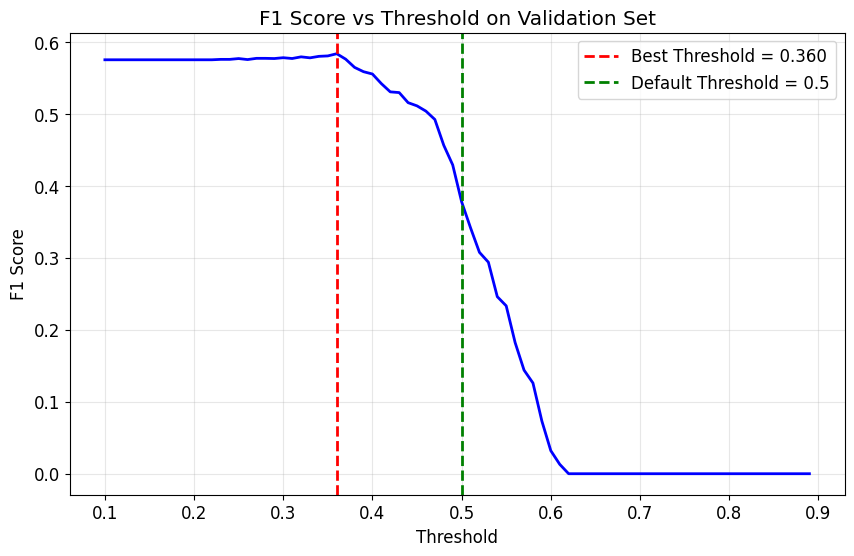

Optimal threshold: 0.360
Best validation F1 score: 0.5838

Test Set Results Comparison:


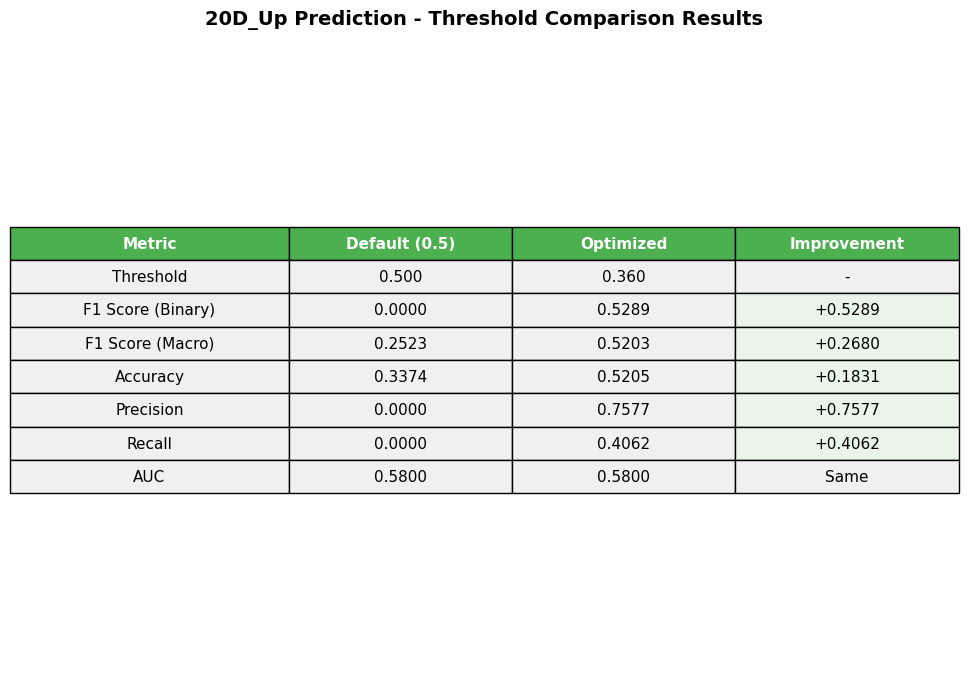

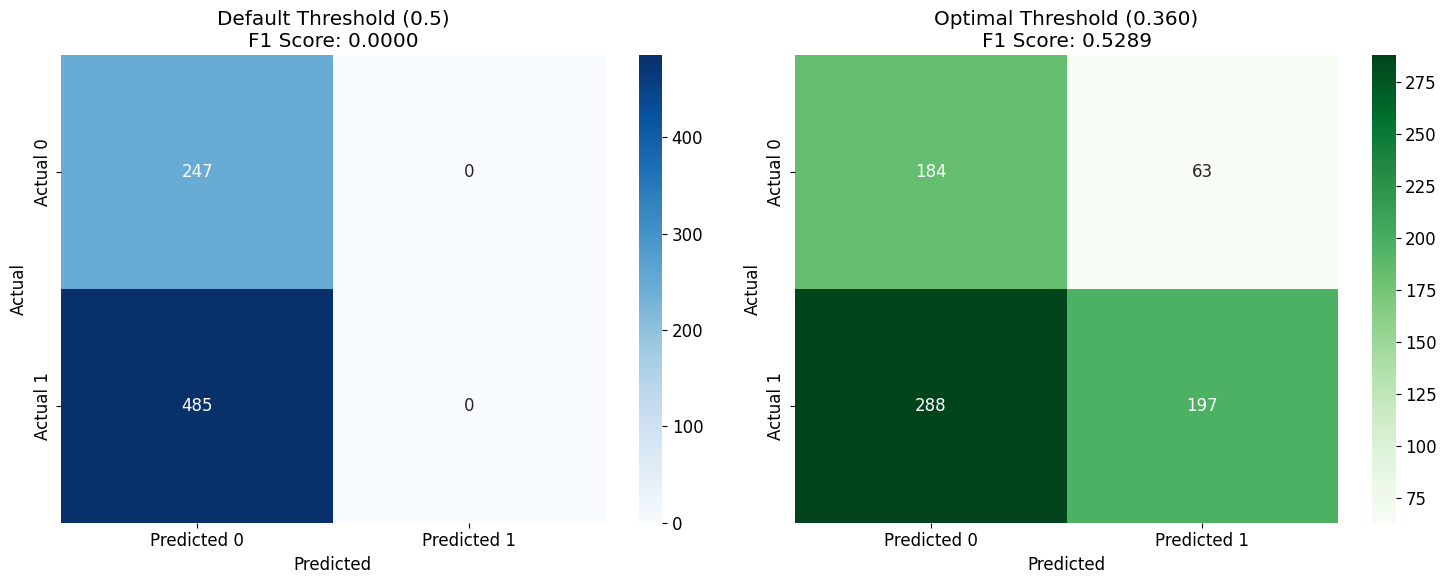


SUMMARY OF THRESHOLD OPTIMIZATION RESULTS

1D_Up Prediction:
  Default F1 (threshold=0.5): 0.1346
  Optimal F1 (threshold=0.420): 0.6810
  F1 Improvement: +0.5464

20D_Up Prediction:
  Default F1 (threshold=0.5): 0.0000
  Optimal F1 (threshold=0.360): 0.5289
  F1 Improvement: +0.5289


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('DATA.csv')

# Define feature columns
continuous_features = ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct',  'J', 
                      'mfi', 'MACD', 'MACD_diff',  'BB_rel_pos', 'Vol_Change', 'Bitcoin_Close']
binary_features = ['MA5_GT_MA20']
features = continuous_features + binary_features

# Split data by company in chronological order
train_data_list = []
val_data_list = []
test_data_list = []

for company in df['Company'].unique():
    company_data = df[df['Company'] == company].copy()
    company_data = company_data.sort_values('Date')  # Ensure chronological order
    
    n_company = len(company_data)
    train_size = int(0.7 * n_company)
    val_size = int(0.15 * n_company)
    
    train_data_list.append(company_data.iloc[:train_size])
    val_data_list.append(company_data.iloc[train_size:train_size+val_size])
    test_data_list.append(company_data.iloc[train_size+val_size:])

# Concatenate all companies' data
train_data = pd.concat(train_data_list, ignore_index=True)
val_data = pd.concat(val_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Training set company distribution:\n{train_data['Company'].value_counts().sort_index()}")
print(f"Test set company distribution:\n{test_data['Company'].value_counts().sort_index()}")

# Modified preprocessing function
def preprocess_data(train_df, val_df, test_df, target_col, continuous_features, binary_features):
    all_features = continuous_features + binary_features
    
    # Drop missing values
    train_df = train_df.dropna(subset=all_features + [target_col])
    val_df = val_df.dropna(subset=all_features + [target_col])
    test_df = test_df.dropna(subset=all_features + [target_col])
    
    # Separate continuous and binary features
    X_train_continuous = train_df[continuous_features]
    X_val_continuous = val_df[continuous_features]
    X_test_continuous = test_df[continuous_features]
    
    X_train_binary = train_df[binary_features]
    X_val_binary = val_df[binary_features]
    X_test_binary = test_df[binary_features]
    
    y_train = train_df[target_col]
    y_val = val_df[target_col]
    y_test = test_df[target_col]
    
    # Standardize only continuous features
    scaler = StandardScaler()
    X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
    X_val_continuous_scaled = scaler.transform(X_val_continuous)
    X_test_continuous_scaled = scaler.transform(X_test_continuous)
    
    # Combine scaled continuous features with unscaled binary features
    X_train_scaled = np.hstack([X_train_continuous_scaled, X_train_binary.values])
    X_val_scaled = np.hstack([X_val_continuous_scaled, X_val_binary.values])
    X_test_scaled = np.hstack([X_test_continuous_scaled, X_test_binary.values])
    
    return X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, scaler

# NEW: Function to find optimal threshold based on validation set F1 score
def find_optimal_threshold(y_val, y_prob_val):
    """
    Find the threshold that maximizes F1 score on validation set
    """
    thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
    best_f1 = 0
    best_threshold = 0.5
    f1_scores = []
    
    for threshold in thresholds:
        y_pred_val = (y_prob_val >= threshold).astype(int)
        f1 = f1_score(y_val, y_pred_val)
        f1_scores.append(f1)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    # Plot F1 scores vs thresholds
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, 'b-', linewidth=2)
    plt.axvline(x=best_threshold, color='r', linestyle='--', linewidth=2, 
                label=f'Best Threshold = {best_threshold:.3f}')
    plt.axvline(x=0.5, color='g', linestyle='--', linewidth=2, 
                label=f'Default Threshold = 0.5')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold on Validation Set')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return best_threshold, best_f1

# Modified evaluation function to compare different thresholds
def evaluate_model_with_thresholds(y_true, y_prob, default_threshold=0.5, optimal_threshold=None, model_name=""):
    """
    Evaluate model with both default (0.5) and optimal thresholds
    """
    # Predictions with default threshold
    y_pred_default = (y_prob >= default_threshold).astype(int)
    
    # Predictions with optimal threshold
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    
    # Calculate metrics for both thresholds
    metrics_default = {
        'threshold': default_threshold,
        'f1_macro': f1_score(y_true, y_pred_default, average='macro'),
        'f1_binary': f1_score(y_true, y_pred_default),
        'accuracy': accuracy_score(y_true, y_pred_default),
        'precision': precision_score(y_true, y_pred_default),
        'recall': recall_score(y_true, y_pred_default),
        'auc': roc_auc_score(y_true, y_prob)
    }
    
    metrics_optimal = {
        'threshold': optimal_threshold,
        'f1_macro': f1_score(y_true, y_pred_optimal, average='macro'),
        'f1_binary': f1_score(y_true, y_pred_optimal),
        'accuracy': accuracy_score(y_true, y_pred_optimal),
        'precision': precision_score(y_true, y_pred_optimal),
        'recall': recall_score(y_true, y_pred_optimal),
        'auc': roc_auc_score(y_true, y_prob)
    }
    
    # Create comparison table
    plt.figure(figsize=(12, 8))
    plt.axis('tight')
    plt.axis('off')
    
    table_data = [
        ['Metric', 'Default (0.5)', 'Optimized', 'Improvement'],
        ['Threshold', f'{metrics_default["threshold"]:.3f}', f'{metrics_optimal["threshold"]:.3f}', '-'],
        ['F1 Score (Binary)', f'{metrics_default["f1_binary"]:.4f}', f'{metrics_optimal["f1_binary"]:.4f}', 
         f'{metrics_optimal["f1_binary"] - metrics_default["f1_binary"]:+.4f}'],
        ['F1 Score (Macro)', f'{metrics_default["f1_macro"]:.4f}', f'{metrics_optimal["f1_macro"]:.4f}', 
         f'{metrics_optimal["f1_macro"] - metrics_default["f1_macro"]:+.4f}'],
        ['Accuracy', f'{metrics_default["accuracy"]:.4f}', f'{metrics_optimal["accuracy"]:.4f}', 
         f'{metrics_optimal["accuracy"] - metrics_default["accuracy"]:+.4f}'],
        ['Precision', f'{metrics_default["precision"]:.4f}', f'{metrics_optimal["precision"]:.4f}', 
         f'{metrics_optimal["precision"] - metrics_default["precision"]:+.4f}'],
        ['Recall', f'{metrics_default["recall"]:.4f}', f'{metrics_optimal["recall"]:.4f}', 
         f'{metrics_optimal["recall"] - metrics_default["recall"]:+.4f}'],
        ['AUC', f'{metrics_default["auc"]:.4f}', f'{metrics_optimal["auc"]:.4f}', 'Same']
    ]
    
    table = plt.table(cellText=table_data[1:], colLabels=table_data[0],
                     cellLoc='center', loc='center',
                     colWidths=[0.25, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.2, 2)
    
    # Set table style
    for i in range(len(table_data)):
        for j in range(len(table_data[0])):
            cell = table[(i, j)]
            if i == 0:  # header
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            elif j == 3 and i > 1 and i < 7:  # improvement column (excluding threshold and AUC)
                improvement = float(table_data[i][j].replace('+', ''))
                if improvement > 0:
                    cell.set_facecolor('#e8f5e8')  # light green for positive
                elif improvement < 0:
                    cell.set_facecolor('#ffe8e8')  # light red for negative
                else:
                    cell.set_facecolor('#f0f0f0')
            else:
                cell.set_facecolor('#f0f0f0')
    
    plt.title(f'{model_name} - Threshold Comparison Results', fontsize=14, fontweight='bold', pad=20)
    plt.show()
    
    # Side-by-side confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Confusion matrix for default threshold
    cm_default = confusion_matrix(y_true, y_pred_default)
    sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    ax1.set_title(f'Default Threshold (0.5)\nF1 Score: {metrics_default["f1_binary"]:.4f}')
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')
    
    # Confusion matrix for optimal threshold
    cm_optimal = confusion_matrix(y_true, y_pred_optimal)
    sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens', ax=ax2,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    ax2.set_title(f'Optimal Threshold ({optimal_threshold:.3f})\nF1 Score: {metrics_optimal["f1_binary"]:.4f}')
    ax2.set_ylabel('Actual')
    ax2.set_xlabel('Predicted')
    
    plt.tight_layout()
    plt.show()
    
    return metrics_default, metrics_optimal

# 1D_Up prediction with threshold optimization
print("=" * 50)
print("1D_Up Prediction Model with Threshold Optimization")
print("=" * 50)

X_train_1d, y_train_1d, X_val_1d, y_val_1d, X_test_1d, y_test_1d, scaler_1d = preprocess_data(
    train_data, val_data, test_data, '1D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_1d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_1d.fit(X_train_1d, y_train_1d)
best_C_1d = grid_search_1d.best_params_['C']
print(f"Best regularization parameter C: {best_C_1d}")

# Train final model with best parameter
final_model_1d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_1d, random_state=42)
final_model_1d.fit(X_train_1d, y_train_1d)

# Get validation set predictions for threshold optimization
y_prob_val_1d = final_model_1d.predict_proba(X_val_1d)[:, 1]

# Find optimal threshold on validation set
print("\nFinding optimal threshold on validation set...")
optimal_threshold_1d, best_val_f1_1d = find_optimal_threshold(y_val_1d, y_prob_val_1d)
print(f"Optimal threshold: {optimal_threshold_1d:.3f}")
print(f"Best validation F1 score: {best_val_f1_1d:.4f}")

# Evaluate on test set with both thresholds
y_prob_test_1d = final_model_1d.predict_proba(X_test_1d)[:, 1]

print("\nTest Set Results Comparison:")
metrics_default_1d, metrics_optimal_1d = evaluate_model_with_thresholds(
    y_test_1d, y_prob_test_1d, 0.5, optimal_threshold_1d, "1D_Up Prediction")

# 20D_Up prediction with threshold optimization
print("\n" + "=" * 50)
print("20D_Up Prediction Model with Threshold Optimization")
print("=" * 50)

X_train_20d, y_train_20d, X_val_20d, y_val_20d, X_test_20d, y_test_20d, scaler_20d = preprocess_data(
    train_data, val_data, test_data, '20D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
grid_search_20d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_20d.fit(X_train_20d, y_train_20d)
best_C_20d = grid_search_20d.best_params_['C']
print(f"Best regularization parameter C: {best_C_20d}")

# Train final model with best parameter
final_model_20d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_20d, random_state=42)
final_model_20d.fit(X_train_20d, y_train_20d)

# Get validation set predictions for threshold optimization
y_prob_val_20d = final_model_20d.predict_proba(X_val_20d)[:, 1]

# Find optimal threshold on validation set
print("\nFinding optimal threshold on validation set...")
optimal_threshold_20d, best_val_f1_20d = find_optimal_threshold(y_val_20d, y_prob_val_20d)
print(f"Optimal threshold: {optimal_threshold_20d:.3f}")
print(f"Best validation F1 score: {best_val_f1_20d:.4f}")

# Evaluate on test set with both thresholds
y_prob_test_20d = final_model_20d.predict_proba(X_test_20d)[:, 1]

print("\nTest Set Results Comparison:")
metrics_default_20d, metrics_optimal_20d = evaluate_model_with_thresholds(
    y_test_20d, y_prob_test_20d, 0.5, optimal_threshold_20d, "20D_Up Prediction")

# Summary of improvements
print("\n" + "=" * 60)
print("SUMMARY OF THRESHOLD OPTIMIZATION RESULTS")
print("=" * 60)

print(f"\n1D_Up Prediction:")
print(f"  Default F1 (threshold=0.5): {metrics_default_1d['f1_binary']:.4f}")
print(f"  Optimal F1 (threshold={optimal_threshold_1d:.3f}): {metrics_optimal_1d['f1_binary']:.4f}")
print(f"  F1 Improvement: {metrics_optimal_1d['f1_binary'] - metrics_default_1d['f1_binary']:+.4f}")

print(f"\n20D_Up Prediction:")
print(f"  Default F1 (threshold=0.5): {metrics_default_20d['f1_binary']:.4f}")
print(f"  Optimal F1 (threshold={optimal_threshold_20d:.3f}): {metrics_optimal_20d['f1_binary']:.4f}")
print(f"  F1 Improvement: {metrics_optimal_20d['f1_binary'] - metrics_default_20d['f1_binary']:+.4f}")

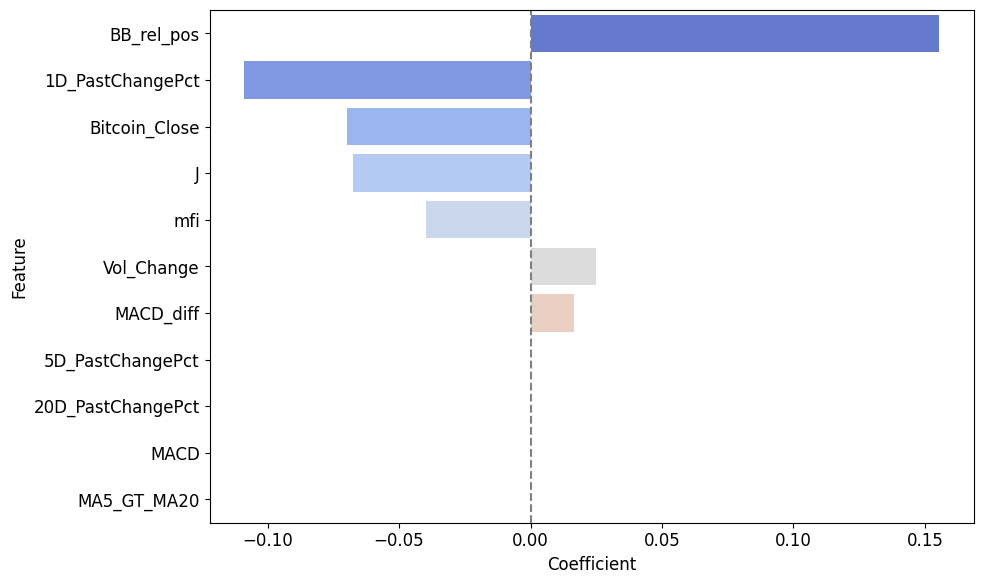

          Feature  Coefficient
       BB_rel_pos     0.155465
 1D_PastChangePct    -0.108871
    Bitcoin_Close    -0.069689
                J    -0.067585
              mfi    -0.039632
       Vol_Change     0.024762
        MACD_diff     0.016518
 5D_PastChangePct     0.000000
20D_PastChangePct     0.000000
             MACD     0.000000
      MA5_GT_MA20     0.000000


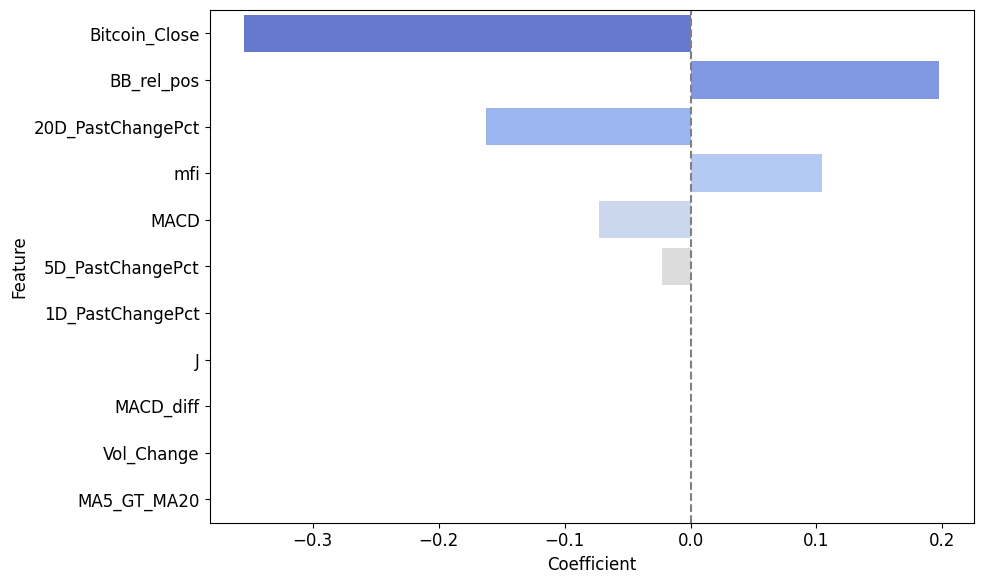

          Feature  Coefficient
    Bitcoin_Close    -0.354244
       BB_rel_pos     0.197447
20D_PastChangePct    -0.162677
              mfi     0.104130
             MACD    -0.072820
 5D_PastChangePct    -0.022419
 1D_PastChangePct     0.000000
                J     0.000000
        MACD_diff     0.000000
       Vol_Change     0.000000
      MA5_GT_MA20     0.000000


In [27]:
def plot_coefficients(model, feature_names, model_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

    plt.figure(figsize=(10, max(6, 0.4*len(coef_df))))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Optionally print table too
    print(coef_df.to_string(index=False))
plot_coefficients(final_model_1d, features, "1D_Up Prediction")
plot_coefficients(final_model_20d, features, "20D_Up Prediction")

## Gold

Training set size: 3404
Validation set size: 728
Test set size: 732
Training set company distribution:
Company
Alibaba    851
Apple      851
Philips    851
Tesla      851
Name: count, dtype: int64
Test set company distribution:
Company
Alibaba    183
Apple      183
Philips    183
Tesla      183
Name: count, dtype: int64
1D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


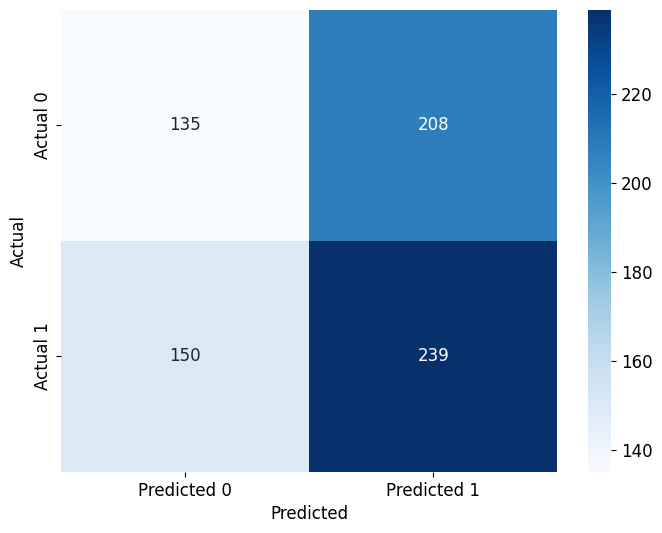

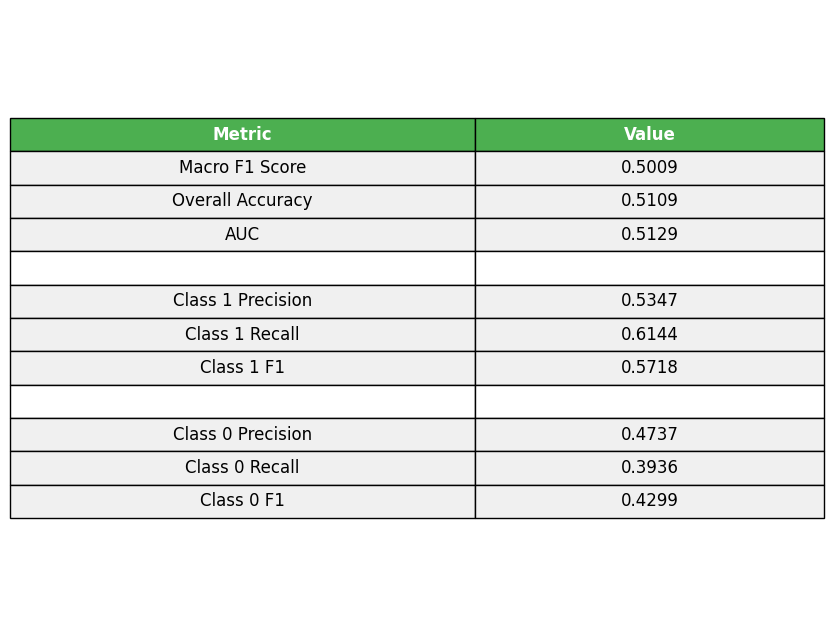


20D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


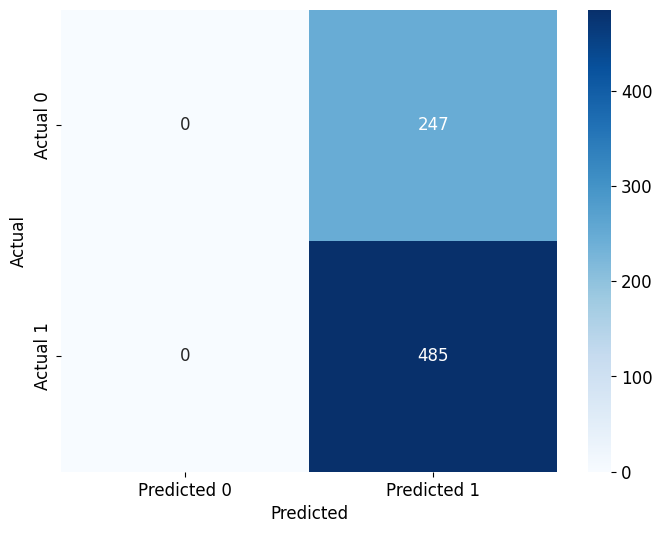

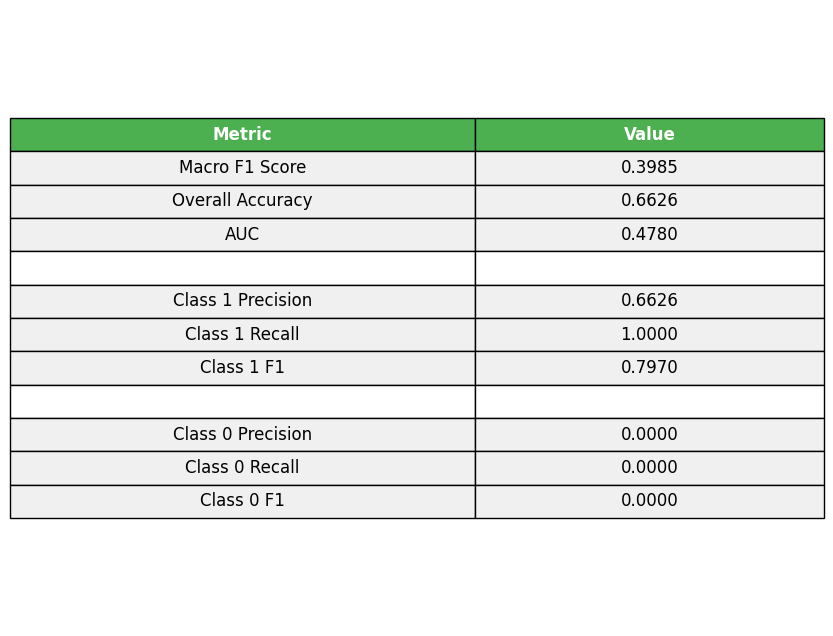

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('DATA.csv')

# Define feature columns
continuous_features = ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct',  'J', 
                      'mfi', 'MACD', 'MACD_diff',  'BB_rel_pos', 'Vol_Change', 'Gold_Close']
binary_features = ['MA5_GT_MA20']
features = continuous_features + binary_features

# Split data by company in chronological order
train_data_list = []
val_data_list = []
test_data_list = []

for company in df['Company'].unique():
    company_data = df[df['Company'] == company].copy()
    company_data = company_data.sort_values('Date')  # Ensure chronological order
    
    n_company = len(company_data)
    train_size = int(0.7 * n_company)
    val_size = int(0.15 * n_company)
    
    train_data_list.append(company_data.iloc[:train_size])
    val_data_list.append(company_data.iloc[train_size:train_size+val_size])
    test_data_list.append(company_data.iloc[train_size+val_size:])

# Concatenate all companies' data
train_data = pd.concat(train_data_list, ignore_index=True)
val_data = pd.concat(val_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Training set company distribution:\n{train_data['Company'].value_counts().sort_index()}")
print(f"Test set company distribution:\n{test_data['Company'].value_counts().sort_index()}")

# Modified preprocessing function
def preprocess_data(train_df, val_df, test_df, target_col, continuous_features, binary_features):
    all_features = continuous_features + binary_features
    
    # Drop missing values
    train_df = train_df.dropna(subset=all_features + [target_col])
    val_df = val_df.dropna(subset=all_features + [target_col])
    test_df = test_df.dropna(subset=all_features + [target_col])
    
    # Separate continuous and binary features
    X_train_continuous = train_df[continuous_features]
    X_val_continuous = val_df[continuous_features]
    X_test_continuous = test_df[continuous_features]
    
    X_train_binary = train_df[binary_features]
    X_val_binary = val_df[binary_features]
    X_test_binary = test_df[binary_features]
    
    y_train = train_df[target_col]
    y_val = val_df[target_col]
    y_test = test_df[target_col]
    
    # Standardize only continuous features
    scaler = StandardScaler()
    X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
    X_val_continuous_scaled = scaler.transform(X_val_continuous)
    X_test_continuous_scaled = scaler.transform(X_test_continuous)
    
    # Combine scaled continuous features with unscaled binary features
    X_train_scaled = np.hstack([X_train_continuous_scaled, X_train_binary.values])
    X_val_scaled = np.hstack([X_val_continuous_scaled, X_val_binary.values])
    X_test_scaled = np.hstack([X_test_continuous_scaled, X_test_binary.values])
    
    return X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, scaler

# NEW Evaluation function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Overall metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    
    # Class-specific metrics
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Performance metrics table - NEW FORMAT
    plt.figure(figsize=(10, 8))
    plt.axis('tight')
    plt.axis('off')
    
    table_data = [
        ['Metric', 'Value'],
        ['Macro F1 Score', f'{f1_macro:.4f}'],
        ['Overall Accuracy', f'{accuracy:.4f}'],
        ['AUC', f'{auc:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 1 Precision', f'{precision_per_class[1]:.4f}'],
        ['Class 1 Recall', f'{recall_per_class[1]:.4f}'],
        ['Class 1 F1', f'{f1_per_class[1]:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 0 Precision', f'{precision_per_class[0]:.4f}'],
        ['Class 0 Recall', f'{recall_per_class[0]:.4f}'],
        ['Class 0 F1', f'{f1_per_class[0]:.4f}']
    ]
    
    table = plt.table(cellText=table_data[1:], colLabels=table_data[0],
                     cellLoc='center', loc='center',
                     colWidths=[0.4, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 2)
    
    # Set table style
    for i in range(len(table_data)):
        for j in range(len(table_data[0])):
            cell = table[(i, j)]
            if i == 0:  # header
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            elif len(table_data[i]) > 0 and table_data[i][0] == '':  # empty rows
                cell.set_facecolor('#ffffff')
                cell.set_text_props(color='white')
            else:
                cell.set_facecolor('#f0f0f0')
    
    plt.show()
    
    return {'confusion_matrix': cm, 'f1_macro': f1_macro, 'accuracy': accuracy, 'auc': auc,
            'class_0_precision': precision_per_class[0], 'class_0_recall': recall_per_class[0], 'class_0_f1': f1_per_class[0],
            'class_1_precision': precision_per_class[1], 'class_1_recall': recall_per_class[1], 'class_1_f1': f1_per_class[1]}

# 1D_Up prediction
print("=" * 50)
print("1D_Up Prediction Model")
print("=" * 50)

X_train_1d, y_train_1d, X_val_1d, y_val_1d, X_test_1d, y_test_1d, scaler_1d = preprocess_data(
    train_data, val_data, test_data, '1D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_1d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_1d.fit(X_train_1d, y_train_1d)
best_C_1d = grid_search_1d.best_params_['C']
print(f"Best regularization parameter C: {best_C_1d}")

# Train final model with best parameter
final_model_1d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_1d, random_state=42)
final_model_1d.fit(X_train_1d, y_train_1d)

# Evaluate on test set
y_pred_1d = final_model_1d.predict(X_test_1d)
y_prob_1d = final_model_1d.predict_proba(X_test_1d)[:, 1]

print("\nTest Set Results:")
results_1d = evaluate_model(y_test_1d, y_pred_1d, y_prob_1d, "1D_Up Prediction")

# 20D_Up prediction
print("\n" + "=" * 50)
print("20D_Up Prediction Model")
print("=" * 50)

X_train_20d, y_train_20d, X_val_20d, y_val_20d, X_test_20d, y_test_20d, scaler_20d = preprocess_data(
    train_data, val_data, test_data, '20D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
grid_search_20d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_20d.fit(X_train_20d, y_train_20d)
best_C_20d = grid_search_20d.best_params_['C']
print(f"Best regularization parameter C: {best_C_20d}")

# Train final model with best parameter
final_model_20d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_20d, random_state=42)
final_model_20d.fit(X_train_20d, y_train_20d)

# Evaluate on test set
y_pred_20d = final_model_20d.predict(X_test_20d)
y_prob_20d = final_model_20d.predict_proba(X_test_20d)[:, 1]

print("\nTest Set Results:")
results_20d = evaluate_model(y_test_20d, y_pred_20d, y_prob_20d, "20D_Up Prediction")

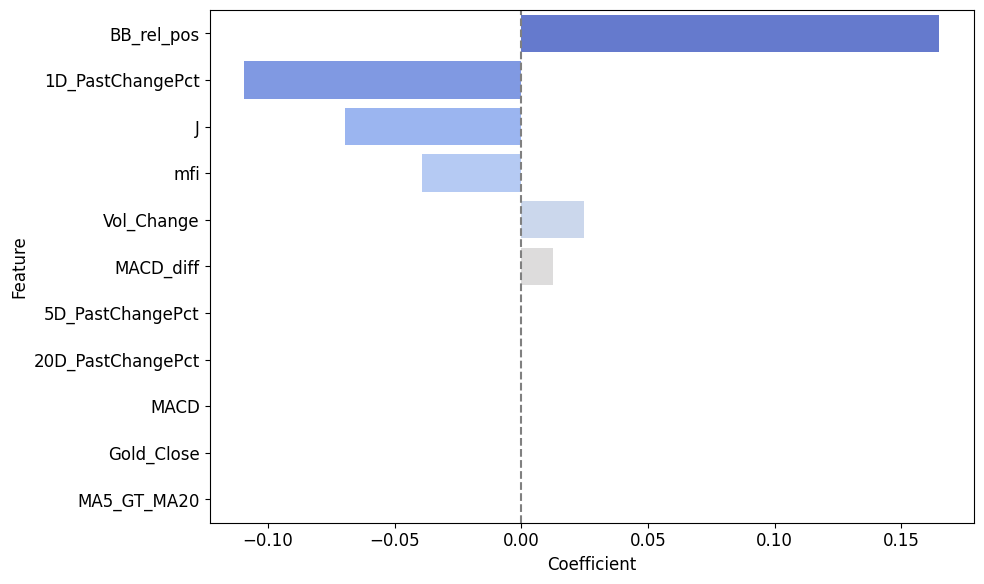

          Feature  Coefficient
       BB_rel_pos     0.165013
 1D_PastChangePct    -0.109404
                J    -0.069601
              mfi    -0.039152
       Vol_Change     0.024777
        MACD_diff     0.012429
 5D_PastChangePct     0.000000
20D_PastChangePct     0.000000
             MACD     0.000000
       Gold_Close     0.000000
      MA5_GT_MA20     0.000000


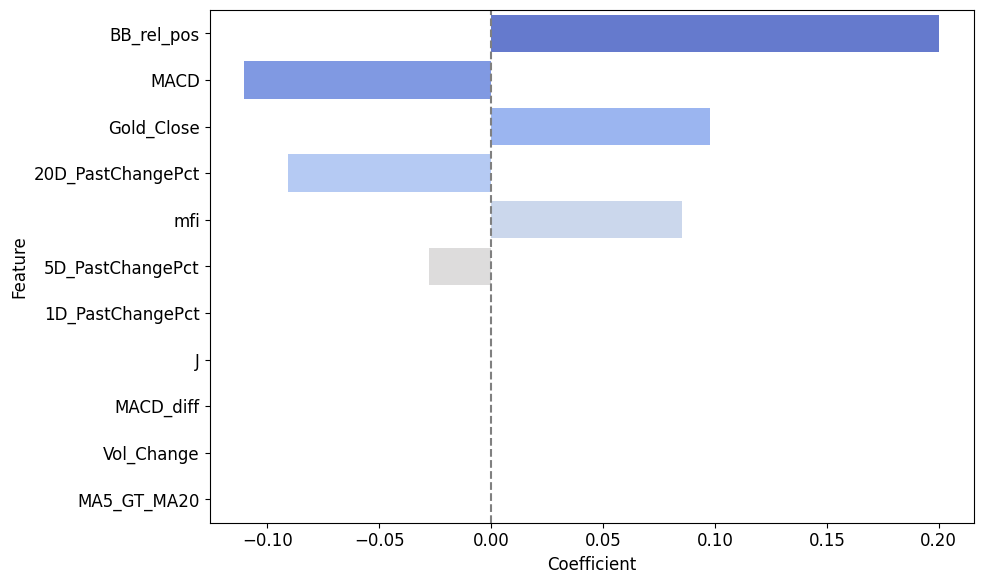

          Feature  Coefficient
       BB_rel_pos     0.200240
             MACD    -0.110364
       Gold_Close     0.097843
20D_PastChangePct    -0.090983
              mfi     0.085143
 5D_PastChangePct    -0.028006
 1D_PastChangePct     0.000000
                J     0.000000
        MACD_diff     0.000000
       Vol_Change     0.000000
      MA5_GT_MA20     0.000000


In [16]:
def plot_coefficients(model, feature_names, model_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

    plt.figure(figsize=(10, max(6, 0.4*len(coef_df))))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Optionally print table too
    print(coef_df.to_string(index=False))
plot_coefficients(final_model_1d, features, "1D_Up Prediction")
plot_coefficients(final_model_20d, features, "20D_Up Prediction")

## add interest rate

Training set size: 3404
Validation set size: 728
Test set size: 732
Training set company distribution:
Company
Alibaba    851
Apple      851
Philips    851
Tesla      851
Name: count, dtype: int64
Test set company distribution:
Company
Alibaba    183
Apple      183
Philips    183
Tesla      183
Name: count, dtype: int64
1D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


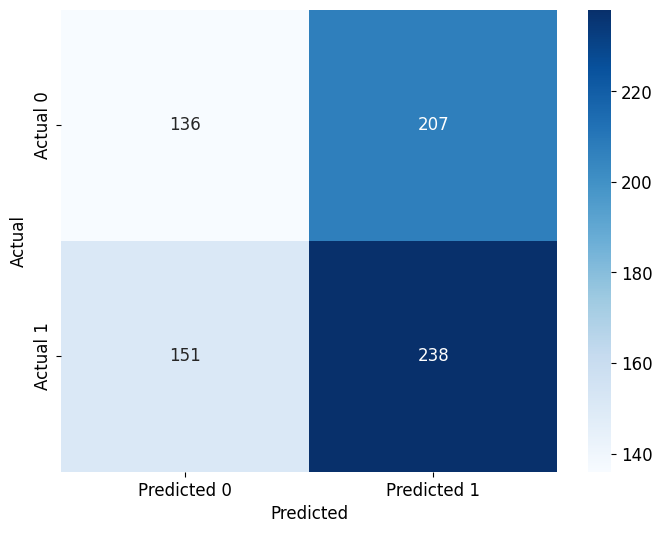

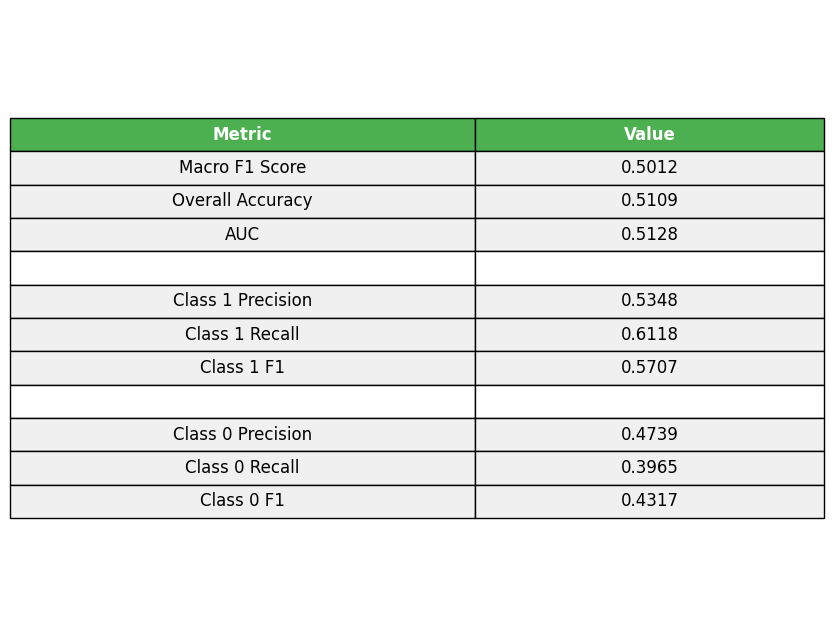


20D_Up Prediction Model
Best regularization parameter C: 0.1

Test Set Results:


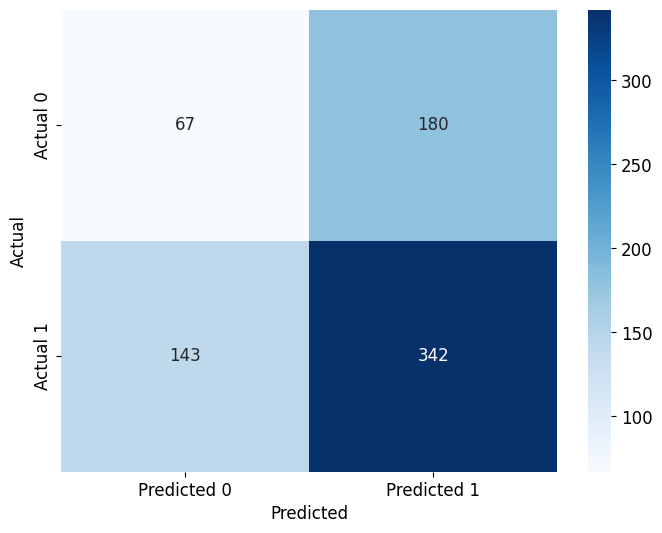

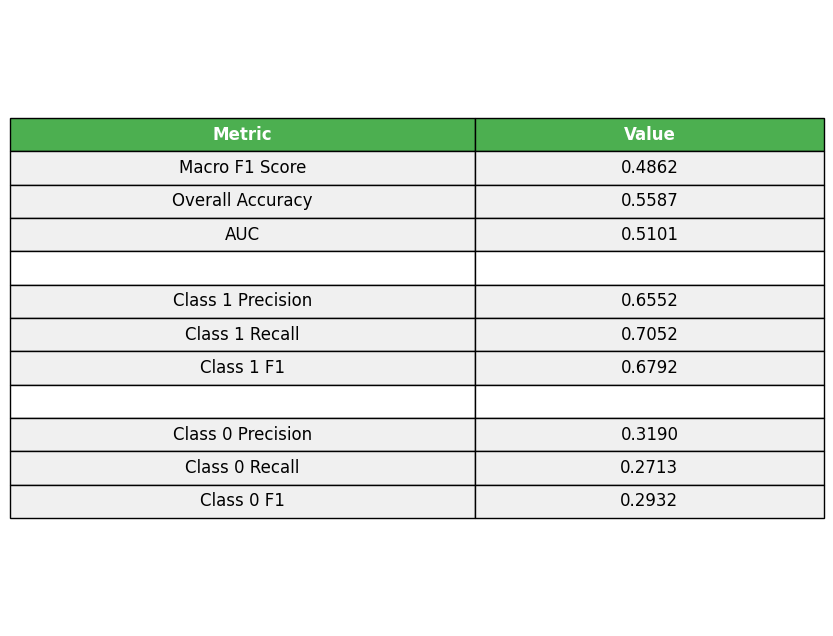

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('DATA.csv')

# Define feature columns
continuous_features = ['1D_PastChangePct', '5D_PastChangePct', '20D_PastChangePct',  'J', 
                      'mfi', 'MACD', 'MACD_diff', 'BB_rel_pos', 'Vol_Change', 'Interest_Rate']
binary_features = ['MA5_GT_MA20']
features = continuous_features + binary_features

# Split data by company in chronological order
train_data_list = []
val_data_list = []
test_data_list = []

for company in df['Company'].unique():
    company_data = df[df['Company'] == company].copy()
    company_data = company_data.sort_values('Date')  # Ensure chronological order
    
    n_company = len(company_data)
    train_size = int(0.7 * n_company)
    val_size = int(0.15 * n_company)
    
    train_data_list.append(company_data.iloc[:train_size])
    val_data_list.append(company_data.iloc[train_size:train_size+val_size])
    test_data_list.append(company_data.iloc[train_size+val_size:])

# Concatenate all companies' data
train_data = pd.concat(train_data_list, ignore_index=True)
val_data = pd.concat(val_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Training set company distribution:\n{train_data['Company'].value_counts().sort_index()}")
print(f"Test set company distribution:\n{test_data['Company'].value_counts().sort_index()}")

# Modified preprocessing function
def preprocess_data(train_df, val_df, test_df, target_col, continuous_features, binary_features):
    all_features = continuous_features + binary_features
    
    # Drop missing values
    train_df = train_df.dropna(subset=all_features + [target_col])
    val_df = val_df.dropna(subset=all_features + [target_col])
    test_df = test_df.dropna(subset=all_features + [target_col])
    
    # Separate continuous and binary features
    X_train_continuous = train_df[continuous_features]
    X_val_continuous = val_df[continuous_features]
    X_test_continuous = test_df[continuous_features]
    
    X_train_binary = train_df[binary_features]
    X_val_binary = val_df[binary_features]
    X_test_binary = test_df[binary_features]
    
    y_train = train_df[target_col]
    y_val = val_df[target_col]
    y_test = test_df[target_col]
    
    # Standardize only continuous features
    scaler = StandardScaler()
    X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
    X_val_continuous_scaled = scaler.transform(X_val_continuous)
    X_test_continuous_scaled = scaler.transform(X_test_continuous)
    
    # Combine scaled continuous features with unscaled binary features
    X_train_scaled = np.hstack([X_train_continuous_scaled, X_train_binary.values])
    X_val_scaled = np.hstack([X_val_continuous_scaled, X_val_binary.values])
    X_test_scaled = np.hstack([X_test_continuous_scaled, X_test_binary.values])
    
    return X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, scaler

# Evaluation function - NEW VERSION
def evaluate_model(y_true, y_pred, y_prob, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Overall metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    
    # Class-specific metrics
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Performance metrics table - NEW FORMAT
    plt.figure(figsize=(10, 8))
    plt.axis('tight')
    plt.axis('off')
    
    table_data = [
        ['Metric', 'Value'],
        ['Macro F1 Score', f'{f1_macro:.4f}'],
        ['Overall Accuracy', f'{accuracy:.4f}'],
        ['AUC', f'{auc:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 1 Precision', f'{precision_per_class[1]:.4f}'],
        ['Class 1 Recall', f'{recall_per_class[1]:.4f}'],
        ['Class 1 F1', f'{f1_per_class[1]:.4f}'],
        ['', ''],  # Empty row for separation
        ['Class 0 Precision', f'{precision_per_class[0]:.4f}'],
        ['Class 0 Recall', f'{recall_per_class[0]:.4f}'],
        ['Class 0 F1', f'{f1_per_class[0]:.4f}']
    ]
    
    table = plt.table(cellText=table_data[1:], colLabels=table_data[0],
                     cellLoc='center', loc='center',
                     colWidths=[0.4, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 2)
    
    # Set table style
    for i in range(len(table_data)):
        for j in range(len(table_data[0])):
            cell = table[(i, j)]
            if i == 0:  # header
                cell.set_facecolor('#4CAF50')
                cell.set_text_props(weight='bold', color='white')
            elif len(table_data[i]) > 0 and table_data[i][0] == '':  # empty rows
                cell.set_facecolor('#ffffff')
                cell.set_text_props(color='white')
            else:
                cell.set_facecolor('#f0f0f0')
    
    plt.show()
    
    return {'confusion_matrix': cm, 'f1_macro': f1_macro, 'accuracy': accuracy, 'auc': auc,
            'class_0_precision': precision_per_class[0], 'class_0_recall': recall_per_class[0], 'class_0_f1': f1_per_class[0],
            'class_1_precision': precision_per_class[1], 'class_1_recall': recall_per_class[1], 'class_1_f1': f1_per_class[1]}

# 1D_Up prediction
print("=" * 50)
print("1D_Up Prediction Model")
print("=" * 50)

X_train_1d, y_train_1d, X_val_1d, y_val_1d, X_test_1d, y_test_1d, scaler_1d = preprocess_data(
    train_data, val_data, test_data, '1D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_1d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_1d.fit(X_train_1d, y_train_1d)
best_C_1d = grid_search_1d.best_params_['C']
print(f"Best regularization parameter C: {best_C_1d}")

# Train final model with best parameter
final_model_1d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_1d, random_state=42)
final_model_1d.fit(X_train_1d, y_train_1d)

# Evaluate on test set
y_pred_1d = final_model_1d.predict(X_test_1d)
y_prob_1d = final_model_1d.predict_proba(X_test_1d)[:, 1]

print("\nTest Set Results:")
results_1d = evaluate_model(y_test_1d, y_pred_1d, y_prob_1d, "1D_Up Prediction")

# 20D_Up prediction
print("\n" + "=" * 50)
print("20D_Up Prediction Model")
print("=" * 50)

X_train_20d, y_train_20d, X_val_20d, y_val_20d, X_test_20d, y_test_20d, scaler_20d = preprocess_data(
    train_data, val_data, test_data, '20D_Up', continuous_features, binary_features)

# TimeSeriesSplit cross-validation to select best regularization parameter
grid_search_20d = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid, cv=tscv, scoring='f1', n_jobs=-1
)

grid_search_20d.fit(X_train_20d, y_train_20d)
best_C_20d = grid_search_20d.best_params_['C']
print(f"Best regularization parameter C: {best_C_20d}")

# Train final model with best parameter
final_model_20d = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_20d, random_state=42)
final_model_20d.fit(X_train_20d, y_train_20d)

# Evaluate on test set
y_pred_20d = final_model_20d.predict(X_test_20d)
y_prob_20d = final_model_20d.predict_proba(X_test_20d)[:, 1]

print("\nTest Set Results:")
results_20d = evaluate_model(y_test_20d, y_pred_20d, y_prob_20d, "20D_Up Prediction")

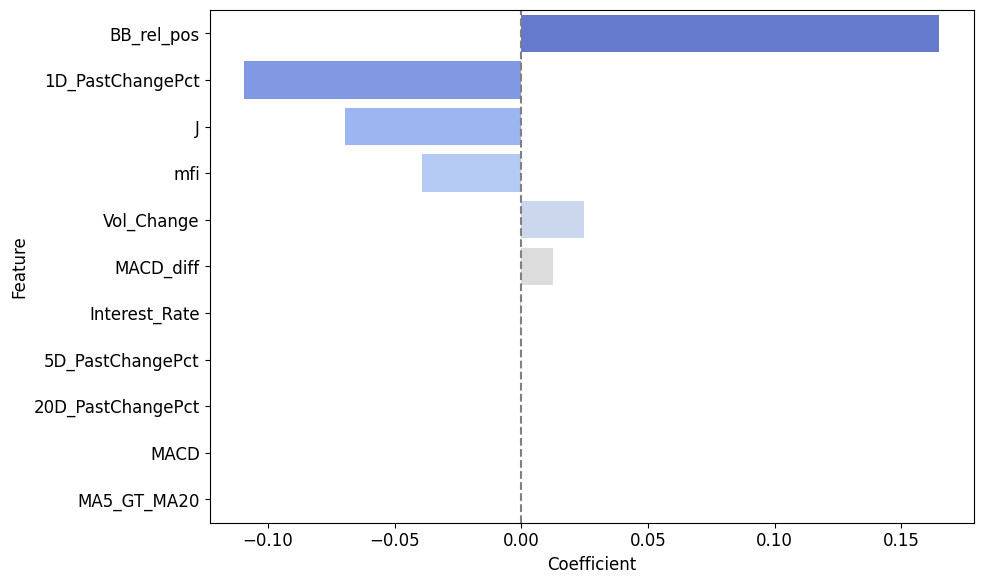

          Feature  Coefficient
       BB_rel_pos     0.164981
 1D_PastChangePct    -0.109393
                J    -0.069598
              mfi    -0.039144
       Vol_Change     0.024771
        MACD_diff     0.012459
    Interest_Rate    -0.000417
 5D_PastChangePct     0.000000
20D_PastChangePct     0.000000
             MACD     0.000000
      MA5_GT_MA20     0.000000


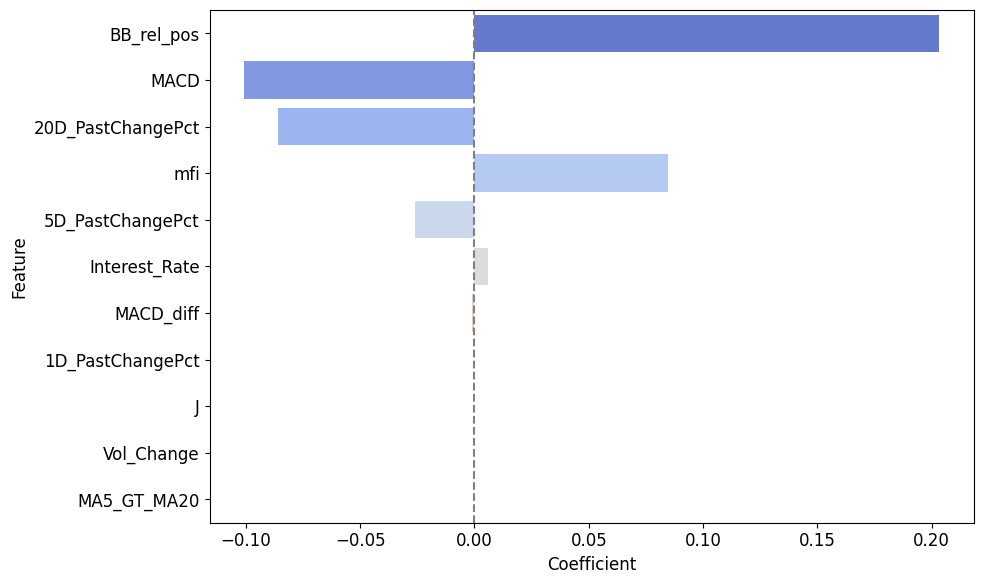

          Feature  Coefficient
       BB_rel_pos     0.203294
             MACD    -0.100686
20D_PastChangePct    -0.086016
              mfi     0.084711
 5D_PastChangePct    -0.025910
    Interest_Rate     0.005778
        MACD_diff    -0.000972
 1D_PastChangePct    -0.000180
                J     0.000000
       Vol_Change     0.000000
      MA5_GT_MA20     0.000000


In [14]:
def plot_coefficients(model, feature_names, model_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

    plt.figure(figsize=(10, max(6, 0.4*len(coef_df))))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Optionally print table too
    print(coef_df.to_string(index=False))
plot_coefficients(final_model_1d, features, "1D_Up Prediction")
plot_coefficients(final_model_20d, features, "20D_Up Prediction")